In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


In [2]:
df = pd.read_csv('./data/HR_Analytics.csv')

In [3]:

df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [5]:
df[df['JobRole'] == 'Human Resources'].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.0,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,35.500000,757.923077,8.173077,2.884615,1.0,1236.326923,2.596154,64.173077,2.711538,1.480769,...,2.961538,80.0,0.750000,8.173077,2.557692,2.923077,5.326923,3.134615,1.269231,3.173077
std,7.937254,418.403166,7.681710,1.022374,0.0,580.294338,1.014785,20.157927,0.723188,0.699871,...,0.989386,0.0,0.882843,4.672494,1.194981,0.788301,3.655354,2.722663,1.646331,2.632535
min,19.000000,106.000000,1.000000,1.000000,1.0,103.000000,1.000000,31.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,29.750000,357.250000,2.000000,2.000000,1.0,811.750000,2.000000,49.500000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,3.000000,2.750000,2.000000,0.000000,2.000000
50%,35.000000,797.500000,6.000000,3.000000,1.0,1301.500000,3.000000,58.500000,3.000000,1.000000,...,3.000000,80.0,1.000000,8.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000
75%,41.250000,1120.500000,11.500000,3.250000,1.0,1754.750000,3.000000,83.250000,3.000000,2.000000,...,4.000000,80.0,1.000000,10.000000,3.000000,3.000000,7.250000,4.000000,2.000000,4.000000
max,59.000000,1444.000000,26.000000,5.000000,1.0,2040.000000,4.000000,100.000000,4.000000,3.000000,...,4.000000,80.0,3.000000,24.000000,6.000000,4.000000,20.000000,10.000000,7.000000,9.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
print("INFORMACIÓN BÁSICA DEL DATASET")
print("="*50)
print(f"Forma del dataset: {df.shape}")
print(f"Valores nulos por columna:")
print(df.isnull().sum())
print(f"\nTipos de datos:")
print(df.dtypes)

# Estadísticas descriptivas
print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*50)
print(df.describe())

print("\nESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("="*50)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (1470, 35)
Valores nulos por columna:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBala


ANÁLISIS DE ATTRITION
Distribución de Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Tasa de Attrition: 16.12%


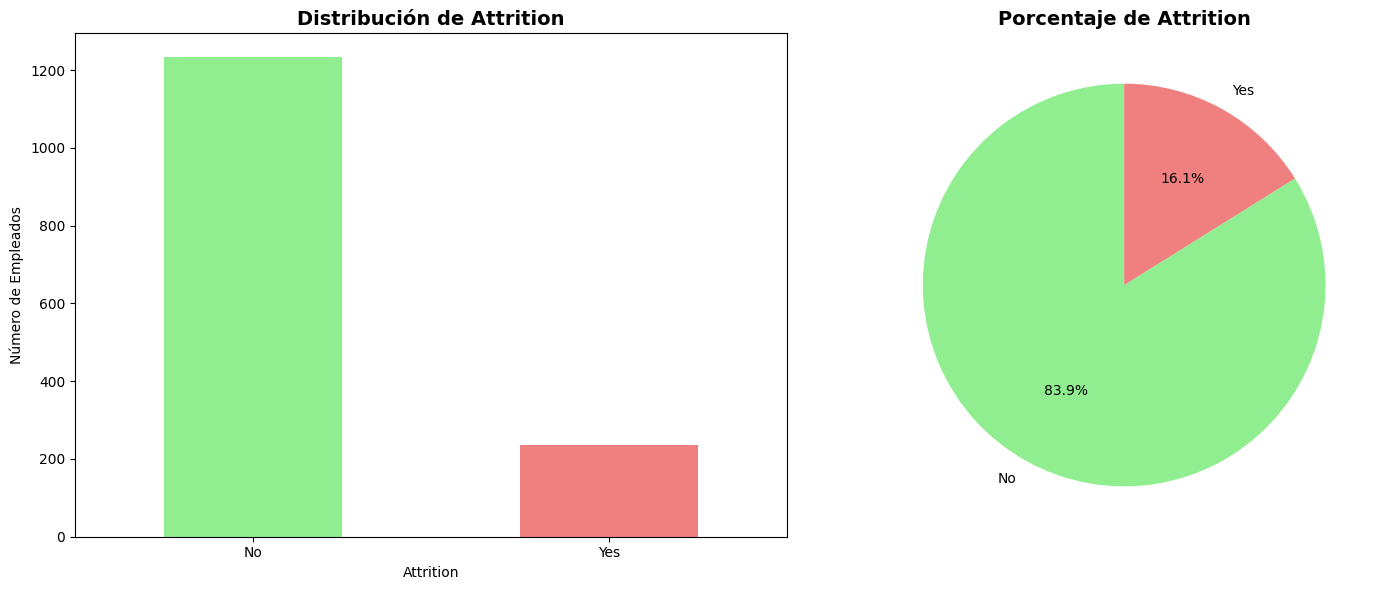

In [5]:
attrition_counts = df['Attrition'].value_counts()
attrition_rate = (attrition_counts['Yes'] / len(df)) * 100

print(f"\nANÁLISIS DE ATTRITION")
print("="*50)
print(f"Distribución de Attrition:")
print(attrition_counts)
print(f"Tasa de Attrition: {attrition_rate:.2f}%")

# Gráfico de distribución de Attrition
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras
attrition_counts.plot(kind='bar', ax=axes[0], color=['lightgreen', 'lightcoral'])
axes[0].set_title('Distribución de Attrition', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Número de Empleados')
axes[0].tick_params(axis='x', rotation=0)

# Gráfico de pastel
axes[1].pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', 
           colors=['lightgreen', 'lightcoral'], startangle=90)
axes[1].set_title('Porcentaje de Attrition', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

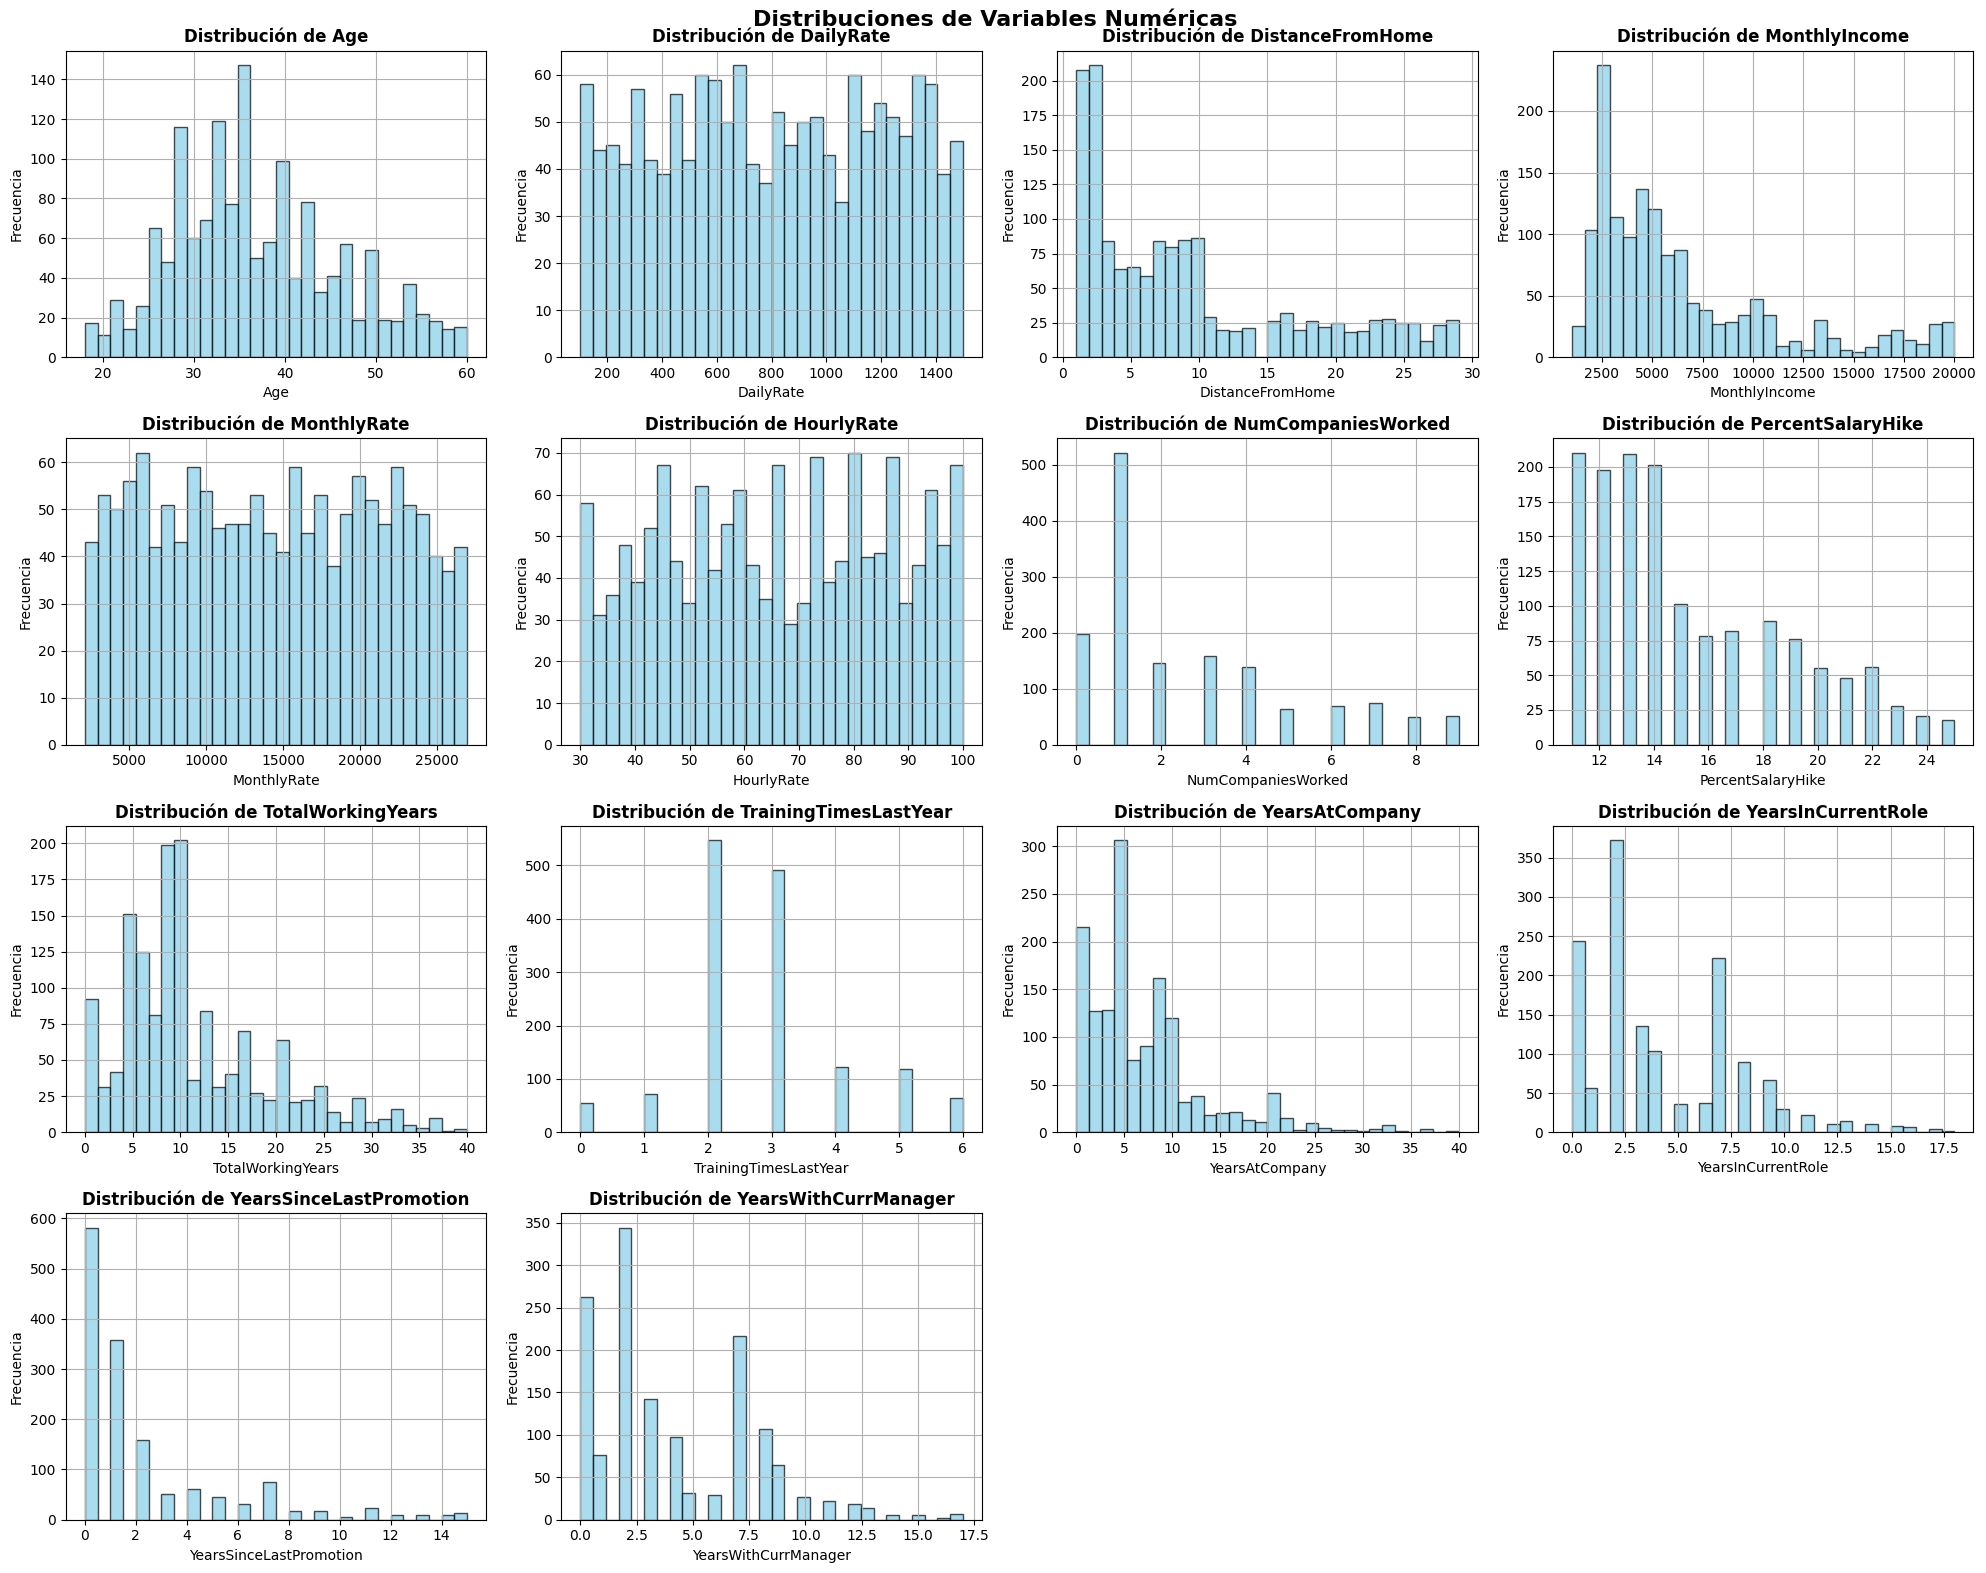

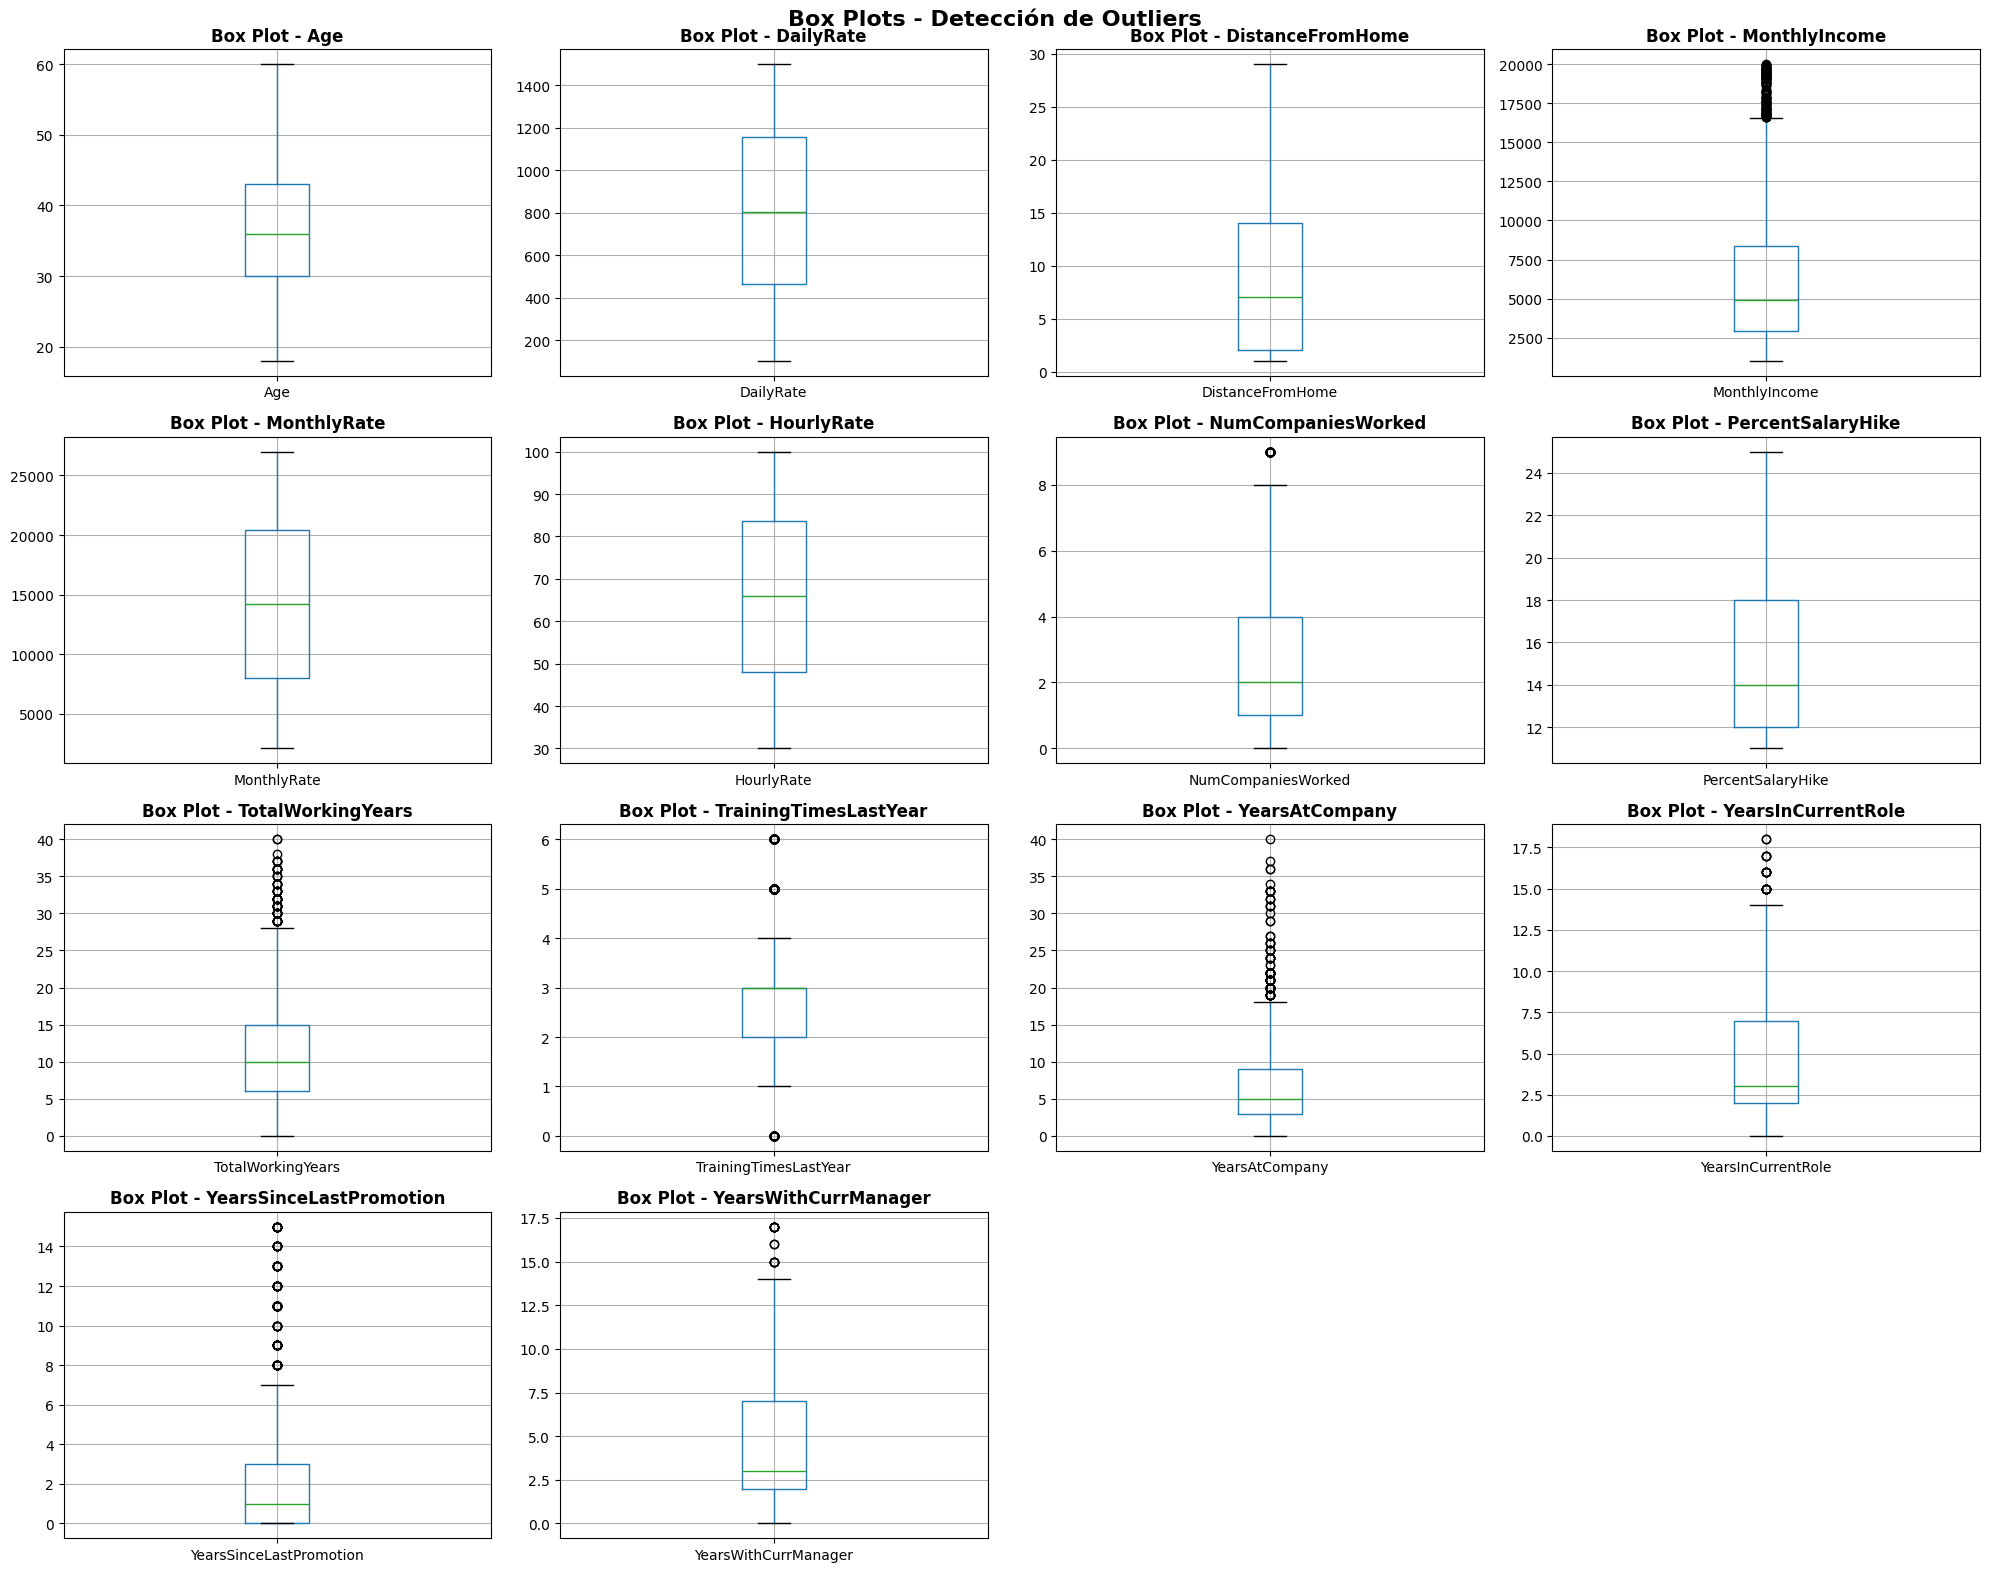

In [6]:
numeric_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 
                'MonthlyRate', 'HourlyRate', 'NumCompaniesWorked', 
                'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                'YearsWithCurrManager']

# Histogramas de variables numéricas
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
        axes[i].set_title(f'Distribución de {col}', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

# Ocultar subplots vacíos
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Distribuciones de Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Box plots para identificar outliers
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        df.boxplot(column=col, ax=axes[i])
        axes[i].set_title(f'Box Plot - {col}', fontweight='bold')

# Ocultar subplots vacíos
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Box Plots - Detección de Outliers', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

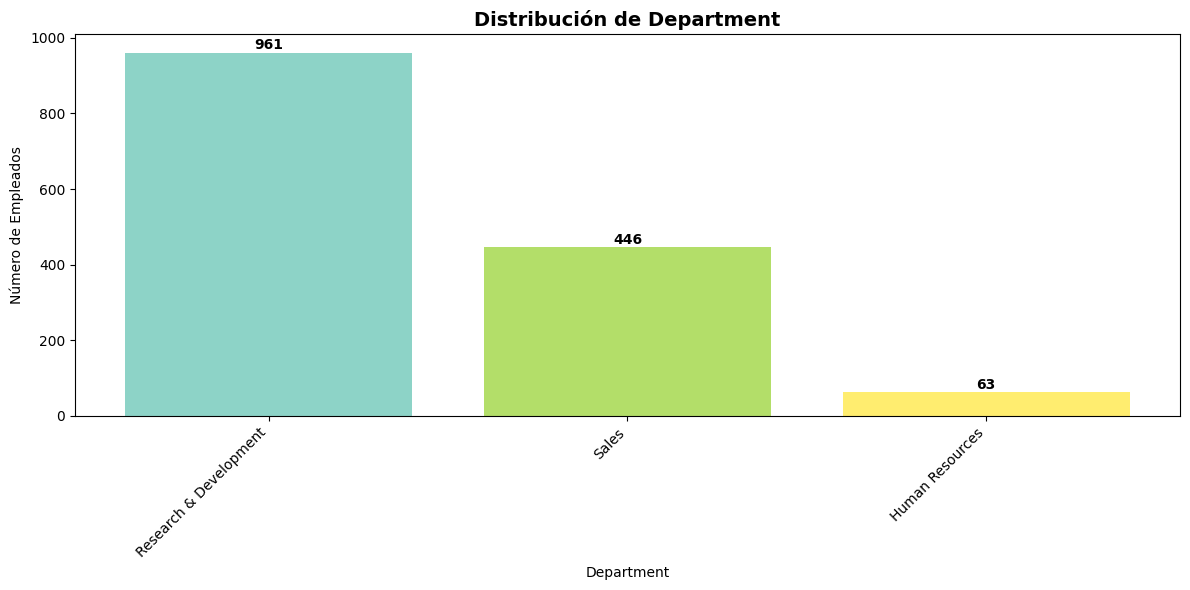

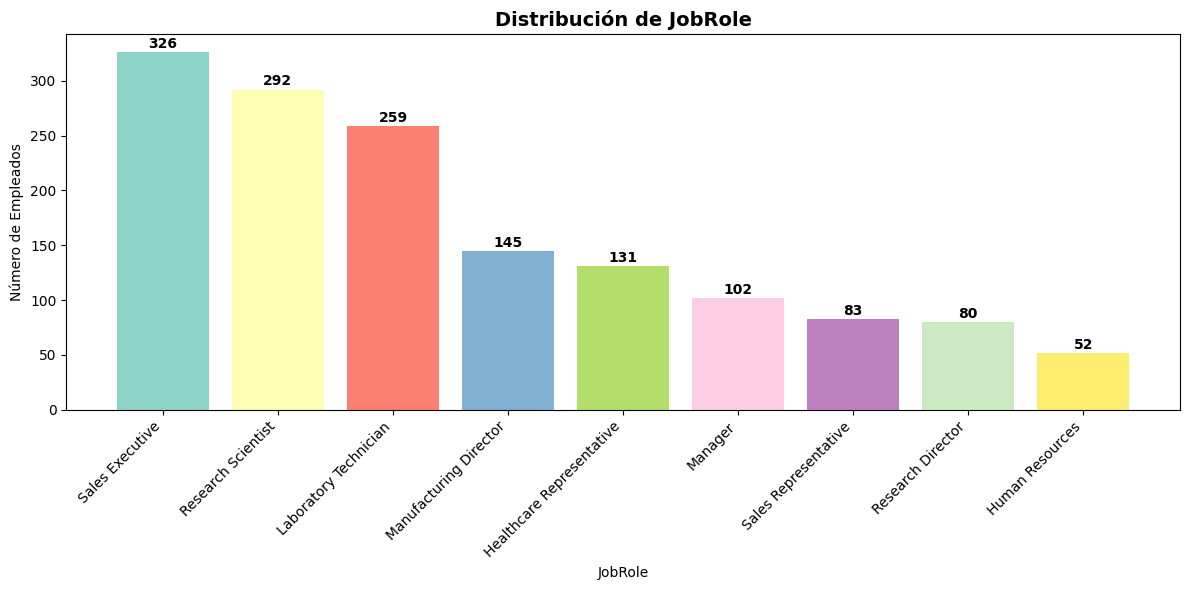

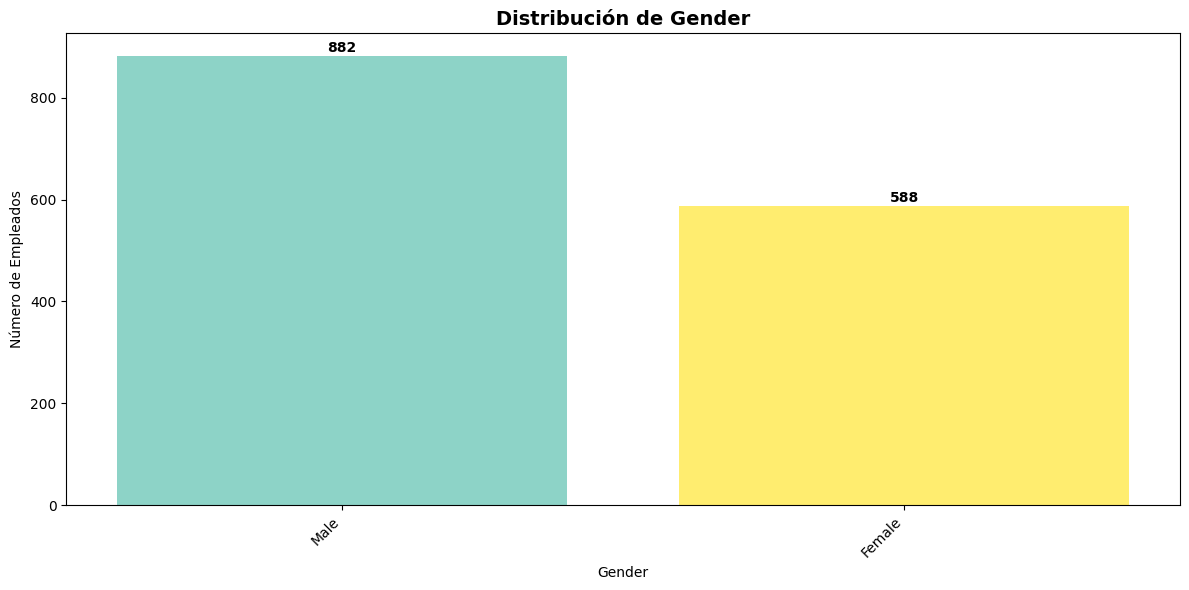

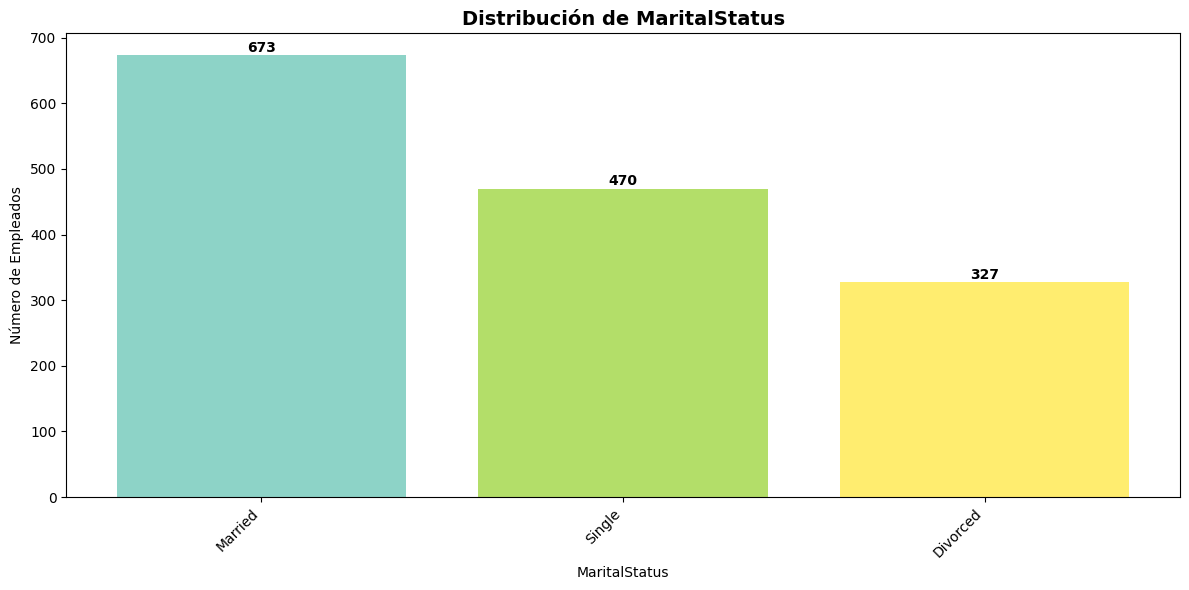

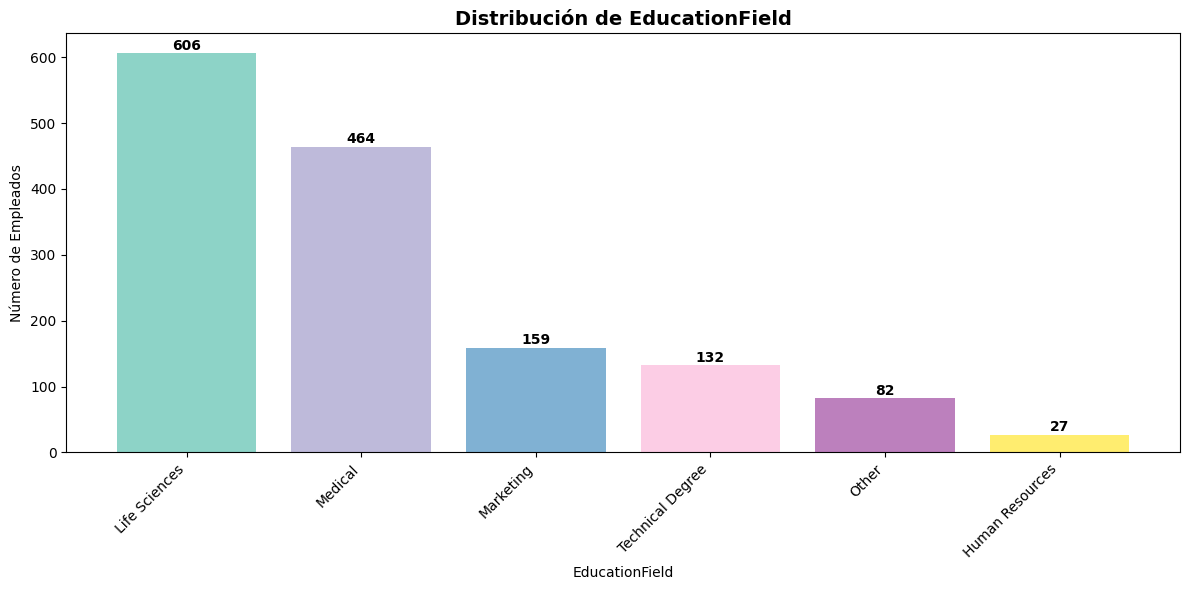

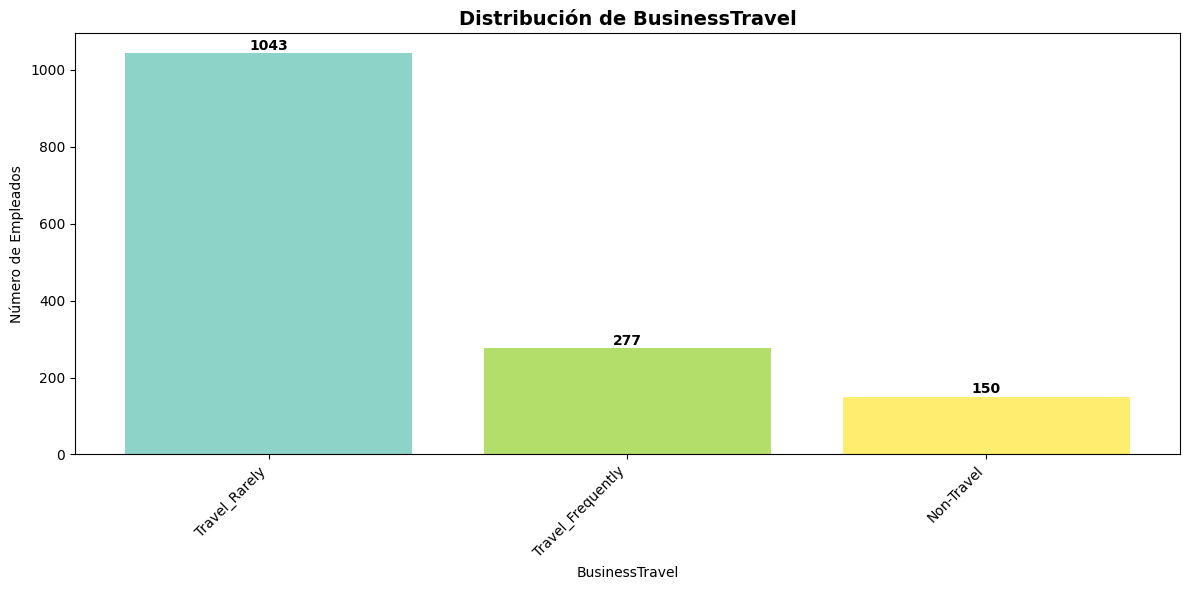

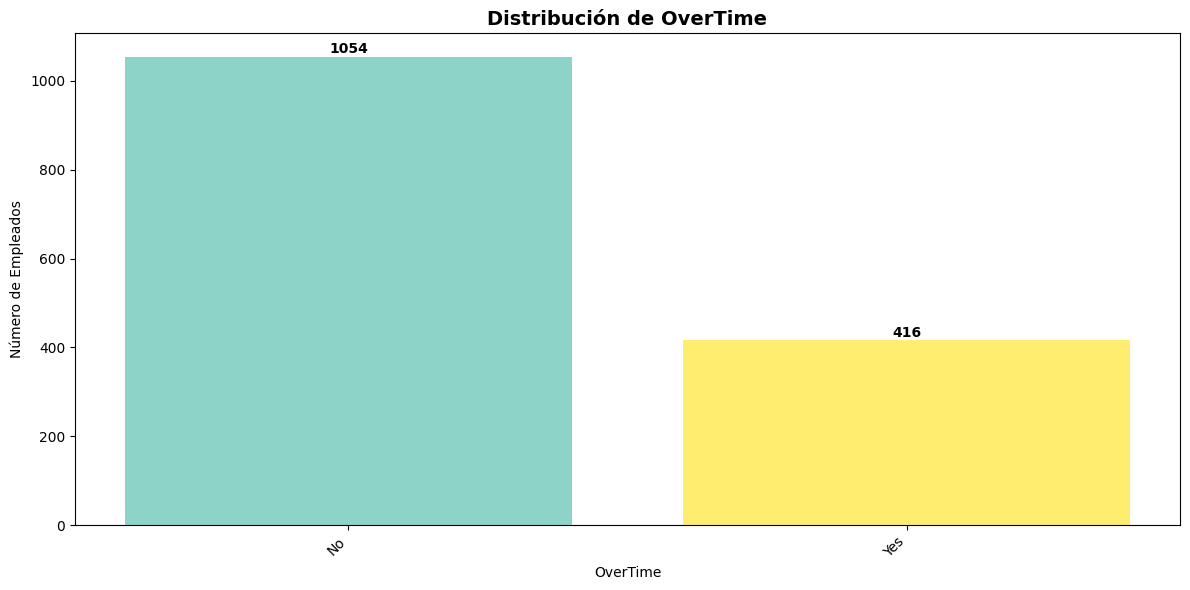

In [7]:
categorical_cols = ['Department', 'JobRole', 'Gender', 'MaritalStatus', 
                   'EducationField', 'BusinessTravel', 'OverTime']

# Gráficos de barras para variables categóricas
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    
    # Contar valores y ordenar
    value_counts = df[col].value_counts()
    
    # Crear gráfico de barras
    bars = plt.bar(range(len(value_counts)), value_counts.values, 
                   color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
    
    plt.title(f'Distribución de {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Número de Empleados')
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    
    # Añadir valores en las barras
    for bar, value in zip(bars, value_counts.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                str(value), ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

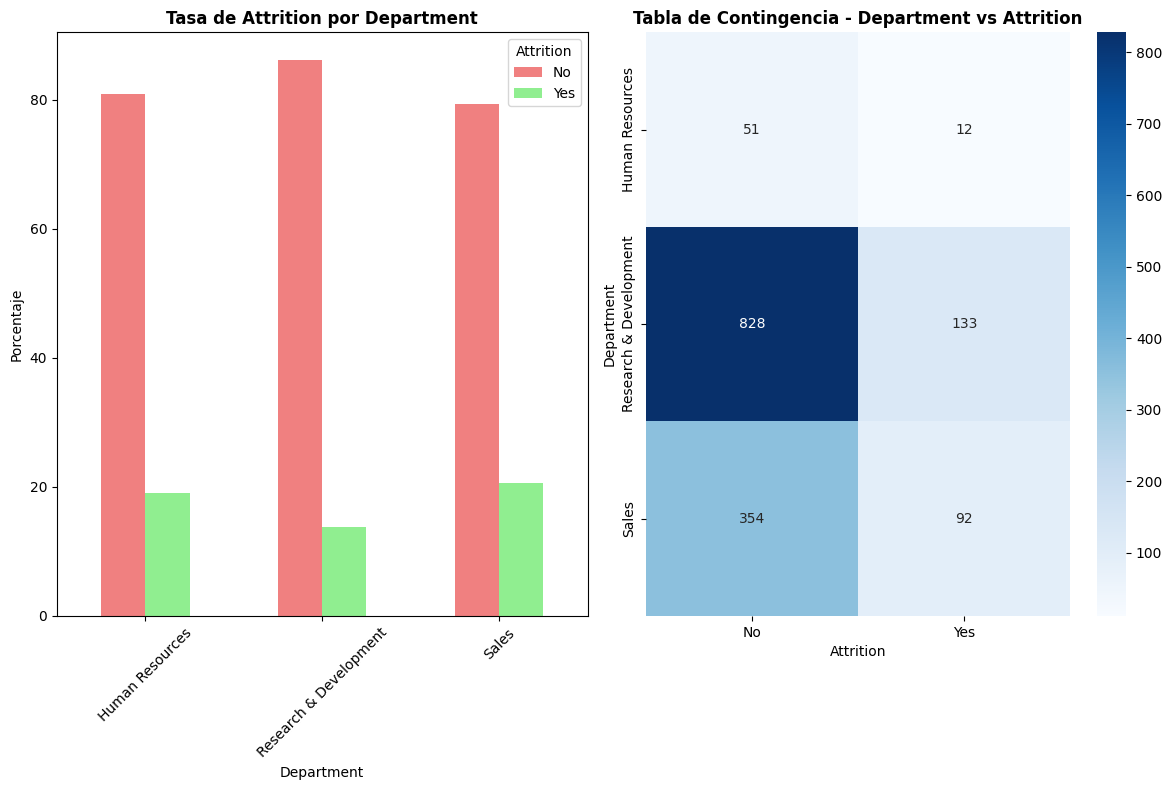


Tasa de Attrition por Department:
Attrition                  No    Yes
Department                          
Human Resources         80.95  19.05
Research & Development  86.16  13.84
Sales                   79.37  20.63

Números absolutos:
Attrition                No  Yes
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92
--------------------------------------------------


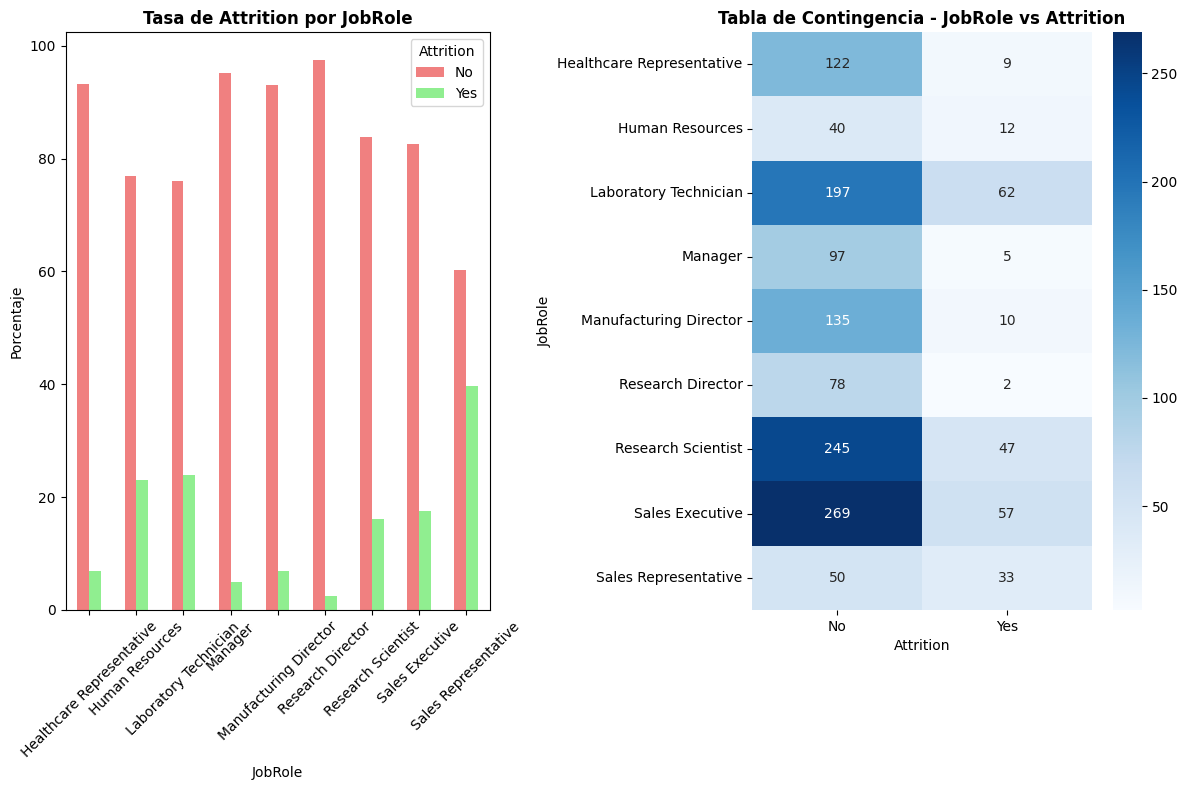


Tasa de Attrition por JobRole:
Attrition                     No    Yes
JobRole                                
Healthcare Representative  93.13   6.87
Human Resources            76.92  23.08
Laboratory Technician      76.06  23.94
Manager                    95.10   4.90
Manufacturing Director     93.10   6.90
Research Director          97.50   2.50
Research Scientist         83.90  16.10
Sales Executive            82.52  17.48
Sales Representative       60.24  39.76

Números absolutos:
Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
--------------------------------------------------


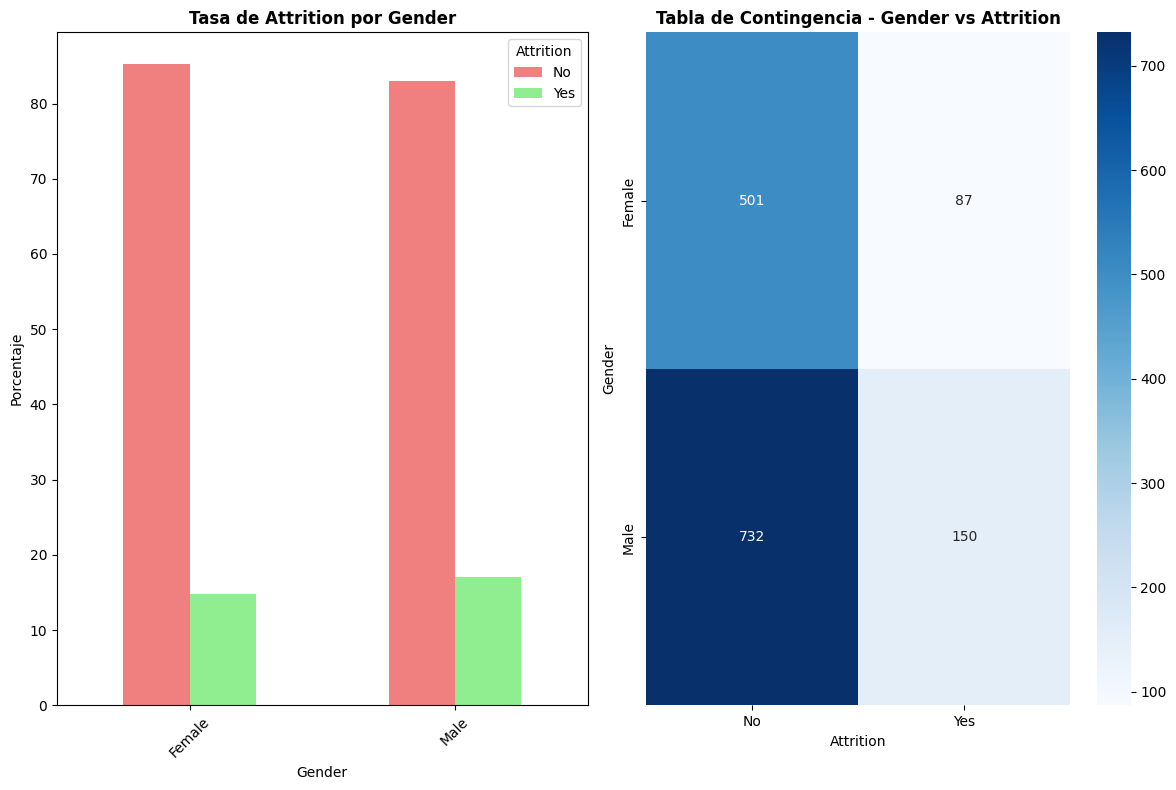


Tasa de Attrition por Gender:
Attrition     No    Yes
Gender                 
Female     85.20  14.80
Male       82.99  17.01

Números absolutos:
Attrition   No  Yes
Gender             
Female     501   87
Male       732  150
--------------------------------------------------


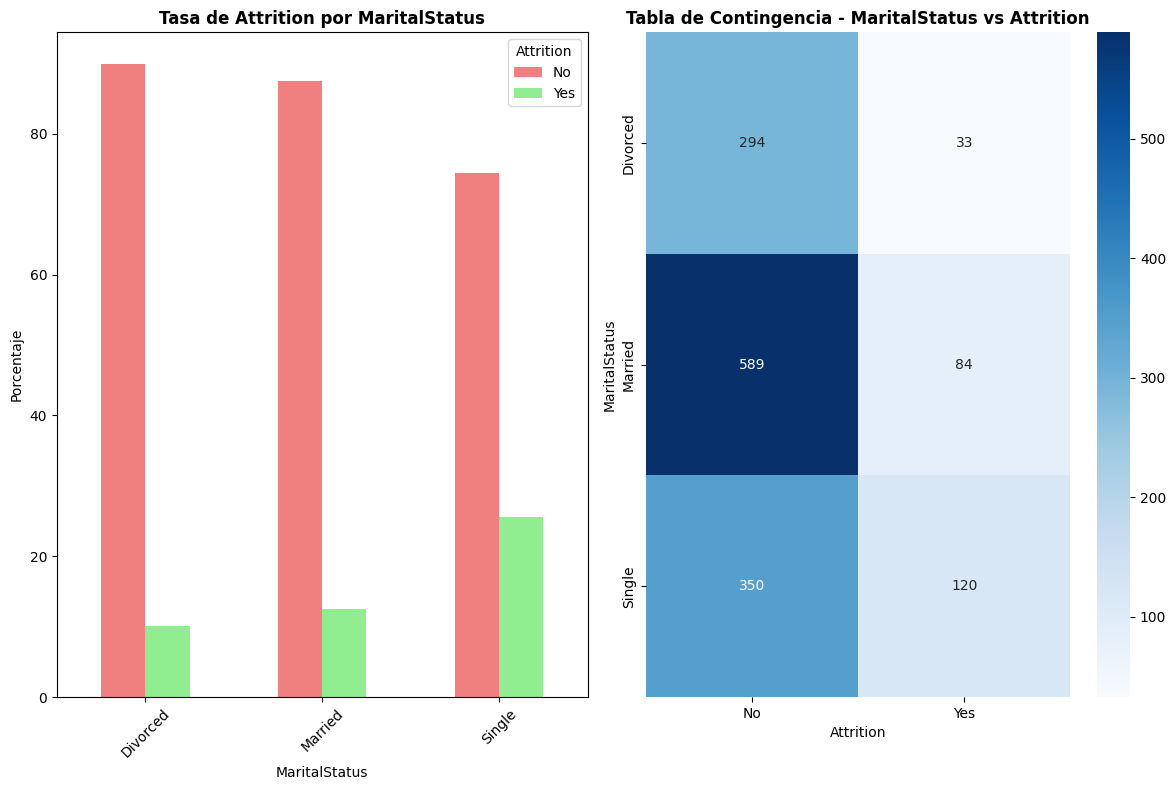


Tasa de Attrition por MaritalStatus:
Attrition         No    Yes
MaritalStatus              
Divorced       89.91  10.09
Married        87.52  12.48
Single         74.47  25.53

Números absolutos:
Attrition       No  Yes
MaritalStatus          
Divorced       294   33
Married        589   84
Single         350  120
--------------------------------------------------


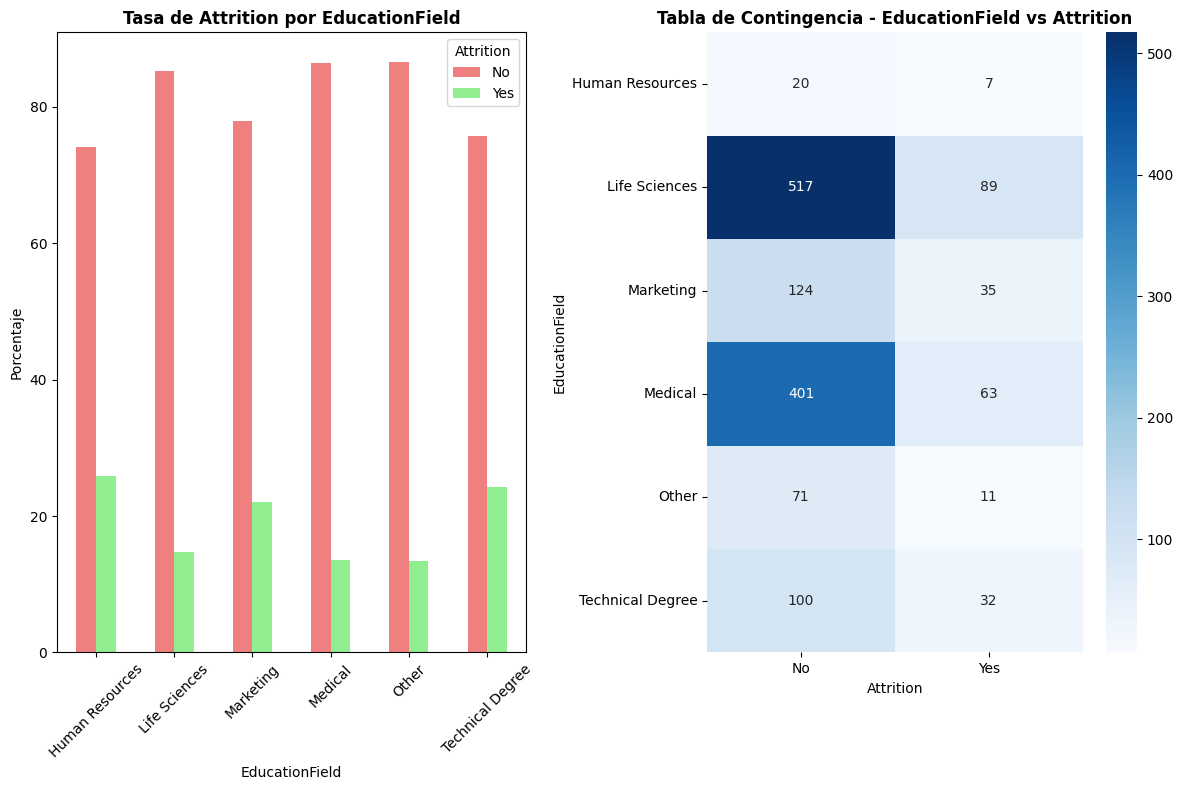


Tasa de Attrition por EducationField:
Attrition            No    Yes
EducationField                
Human Resources   74.07  25.93
Life Sciences     85.31  14.69
Marketing         77.99  22.01
Medical           86.42  13.58
Other             86.59  13.41
Technical Degree  75.76  24.24

Números absolutos:
Attrition          No  Yes
EducationField            
Human Resources    20    7
Life Sciences     517   89
Marketing         124   35
Medical           401   63
Other              71   11
Technical Degree  100   32
--------------------------------------------------


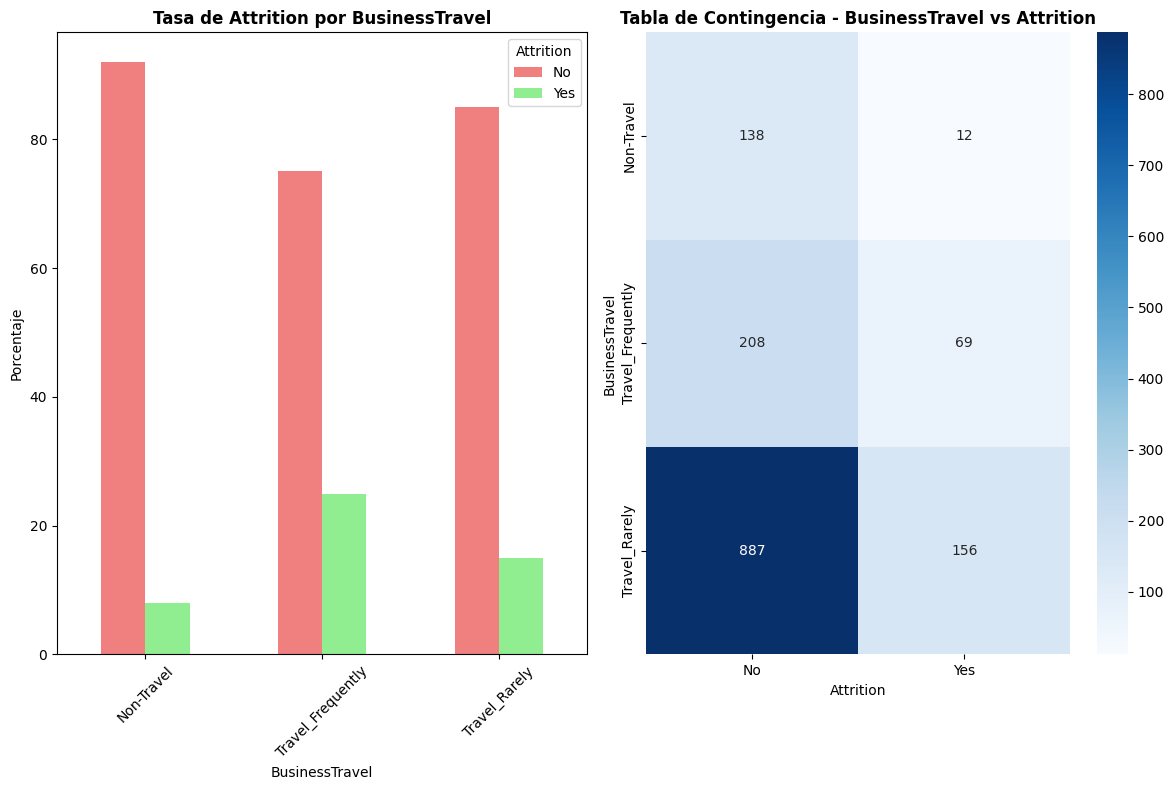


Tasa de Attrition por BusinessTravel:
Attrition             No    Yes
BusinessTravel                 
Non-Travel         92.00   8.00
Travel_Frequently  75.09  24.91
Travel_Rarely      85.04  14.96

Números absolutos:
Attrition           No  Yes
BusinessTravel             
Non-Travel         138   12
Travel_Frequently  208   69
Travel_Rarely      887  156
--------------------------------------------------


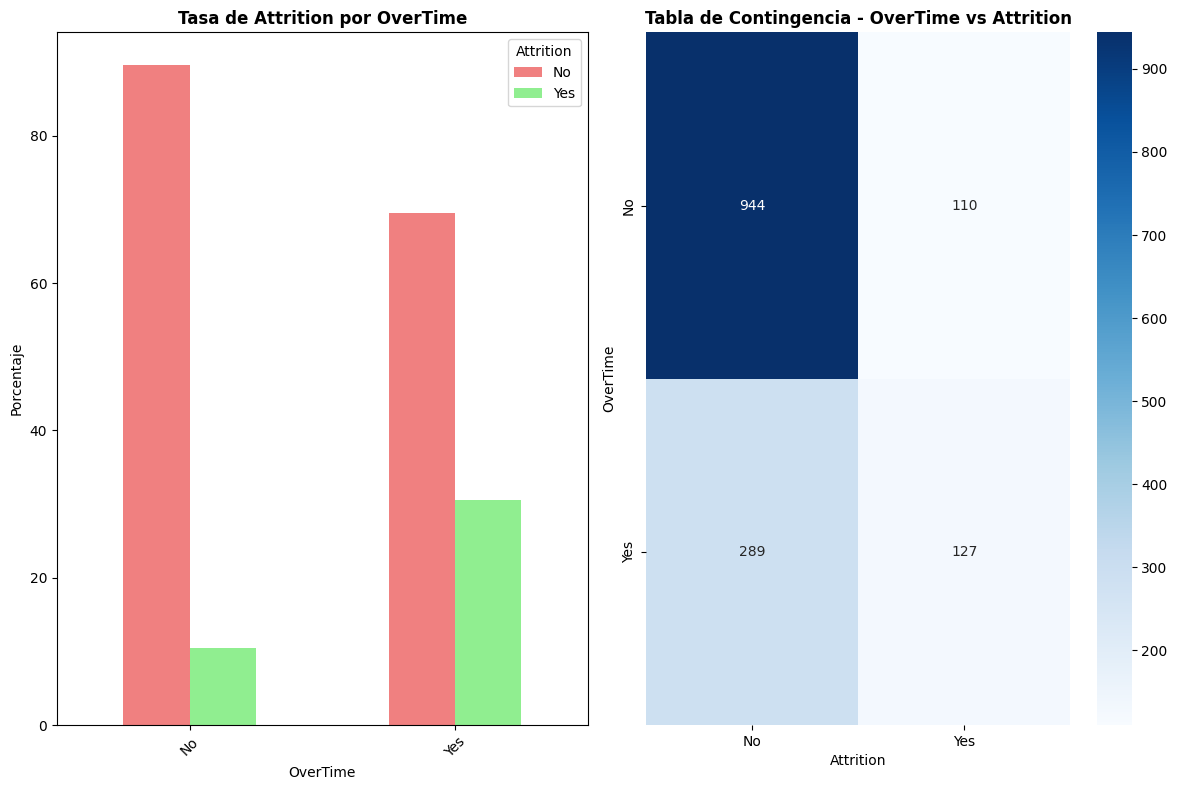


Tasa de Attrition por OverTime:
Attrition     No    Yes
OverTime               
No         89.56  10.44
Yes        69.47  30.53

Números absolutos:
Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127
--------------------------------------------------


In [8]:
# Función para crear gráficos de attrition por categoría
def plot_attrition_by_category(df, category_col, figsize=(12, 8)):
    # Crear crosstab
    ct = pd.crosstab(df[category_col], df['Attrition'], normalize='index') * 100
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Gráfico de barras agrupadas
    ct.plot(kind='bar', ax=axes[0], color=['lightcoral', 'lightgreen' ])
    axes[0].set_title(f'Tasa de Attrition por {category_col}', fontweight='bold')
    axes[0].set_xlabel(category_col)
    axes[0].set_ylabel('Porcentaje')
    axes[0].legend(title='Attrition')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Tabla de contingencia con números absolutos
    ct_abs = pd.crosstab(df[category_col], df['Attrition'])
    sns.heatmap(ct_abs, annot=True, fmt='d', cmap='Blues', ax=axes[1])
    axes[1].set_title(f'Tabla de Contingencia - {category_col} vs Attrition', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir estadísticas
    print(f"\nTasa de Attrition por {category_col}:")
    print(ct.round(2))
    print("\nNúmeros absolutos:")
    print(ct_abs)
    print("-" * 50)

# Aplicar análisis a todas las variables categóricas
for col in categorical_cols:
    plot_attrition_by_category(df, col)

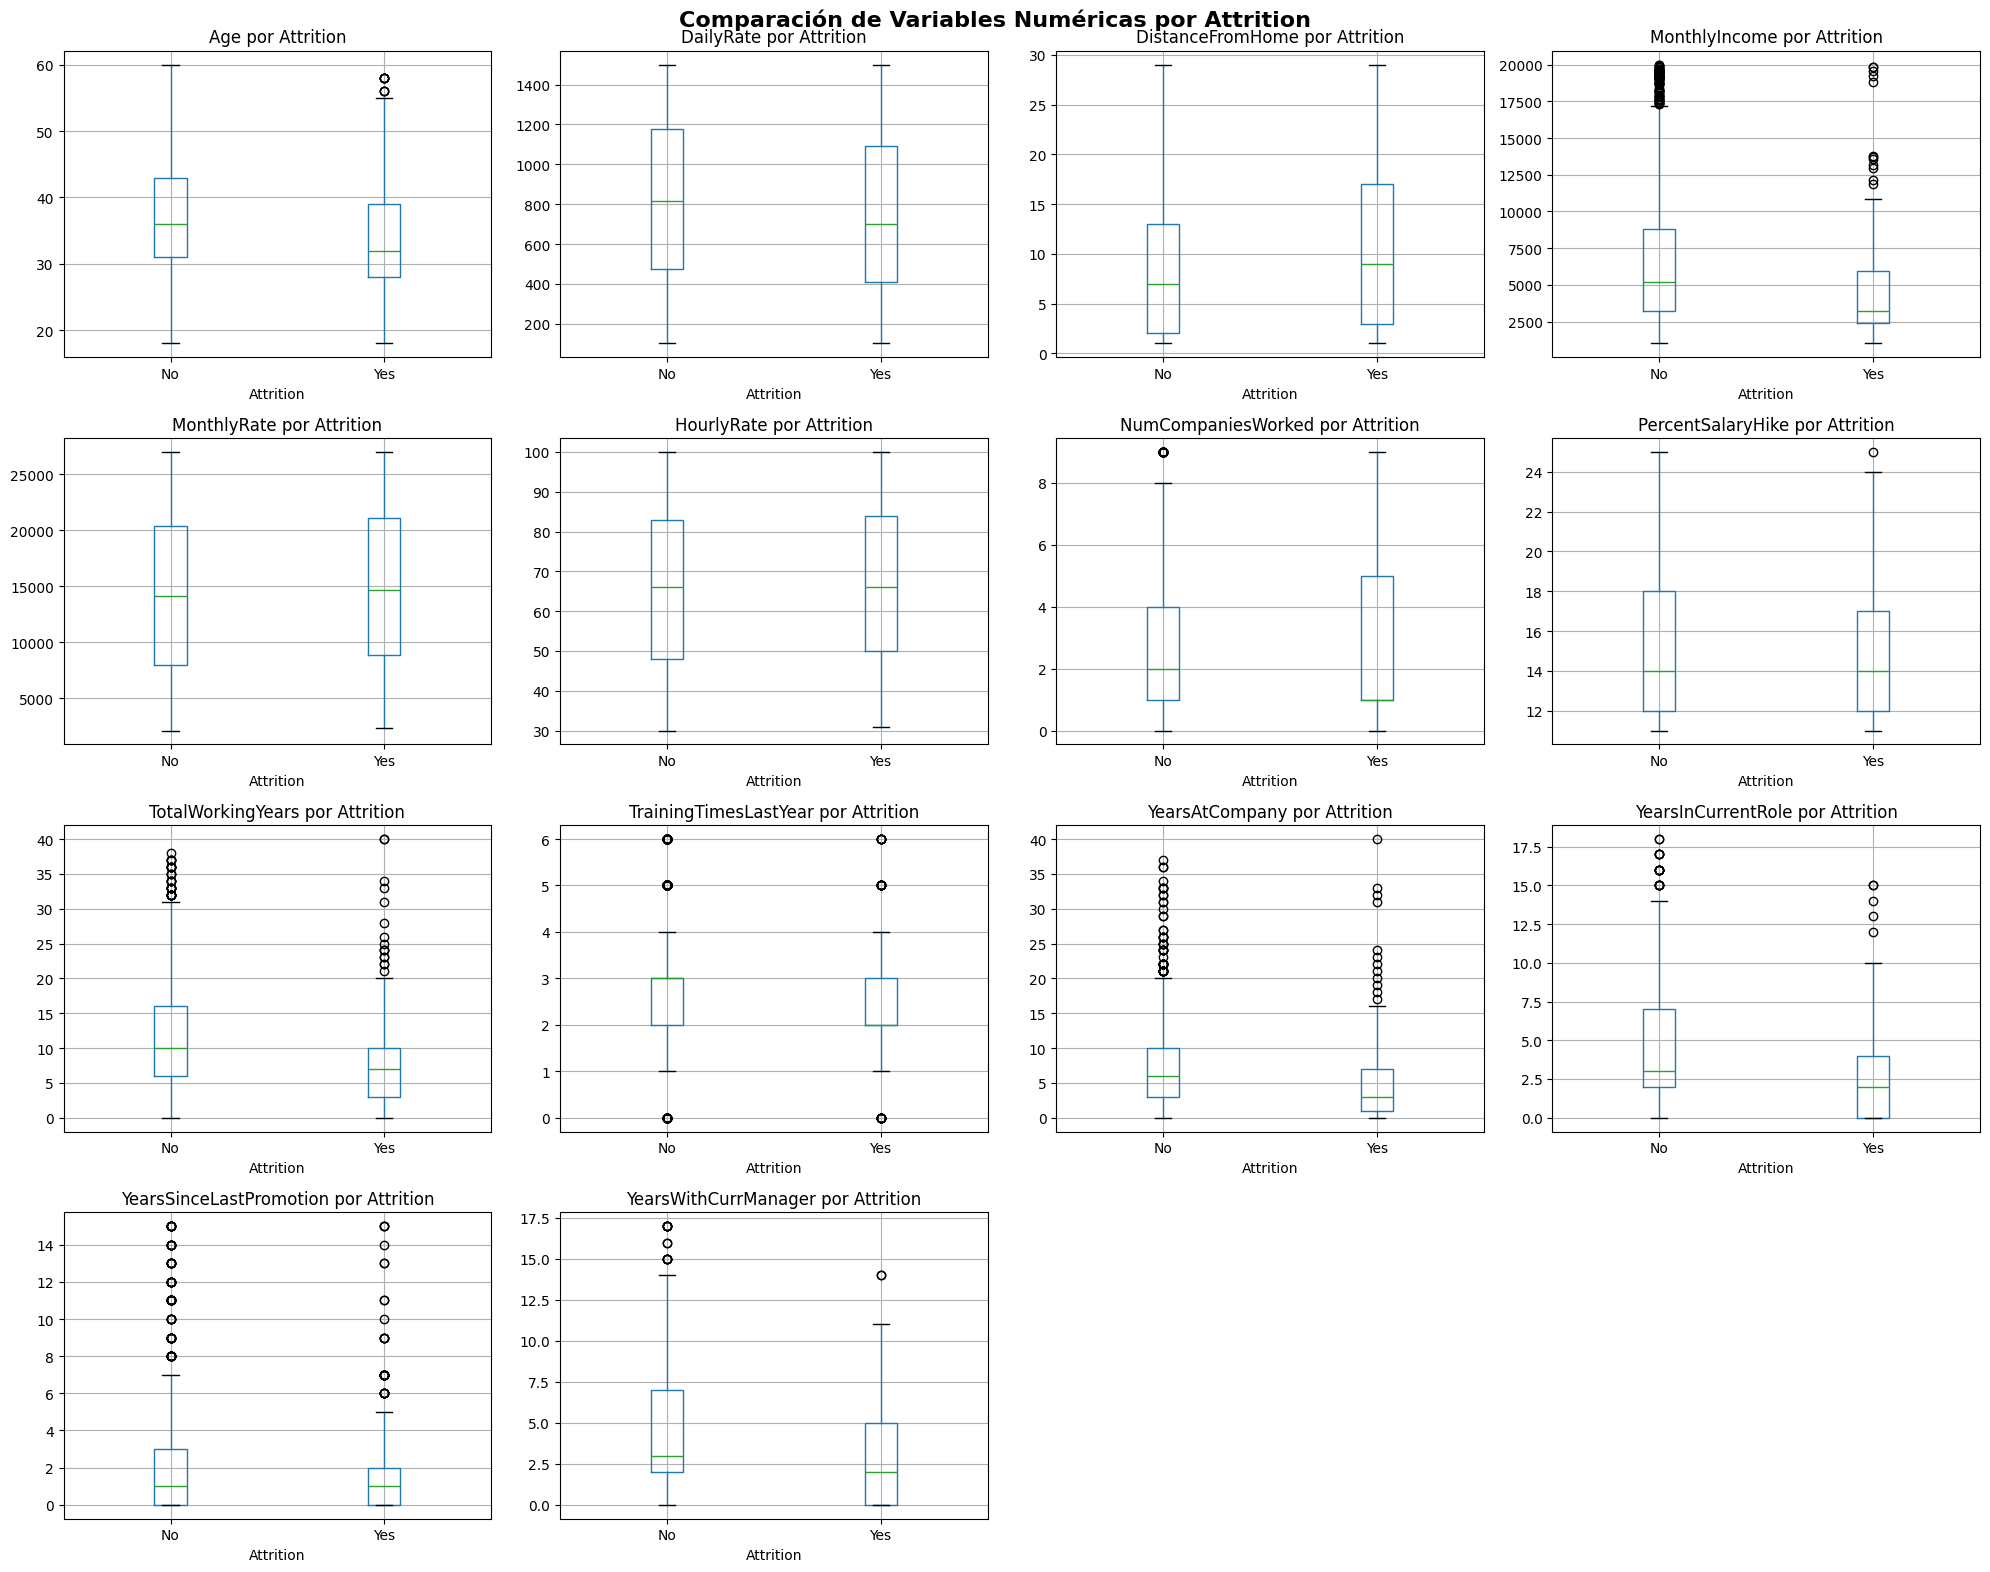


ESTADÍSTICAS DESCRIPTIVAS POR GRUPO DE ATTRITION

Age:
            count       mean      std   min   25%   50%   75%   max
Attrition                                                          
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0

DailyRate:
            count        mean         std    min    25%    50%     75%     max
Attrition                                                                     
No         1233.0  812.504461  403.208379  102.0  477.0  817.0  1176.0  1499.0
Yes         237.0  750.362869  401.899519  103.0  408.0  699.0  1092.0  1496.0

DistanceFromHome:
            count       mean       std  min  25%  50%   75%   max
Attrition                                                        
No         1233.0   8.915653  8.012633  1.0  2.0  7.0  13.0  29.0
Yes         237.0  10.632911  8.452525  1.0  3.0  9.0  17.0  29.0

MonthlyIncome:
            count         mean          std  

In [9]:
# Box plots comparando attrition
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(numeric_cols):
    if i < len(axes):
        df.boxplot(column=col, by='Attrition', ax=axes[i])
        axes[i].set_title(f'{col} por Attrition')
        axes[i].set_xlabel('Attrition')

# Ocultar subplots vacíos
for i in range(len(numeric_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle('Comparación de Variables Numéricas por Attrition', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por grupo de attrition
print("\nESTADÍSTICAS DESCRIPTIVAS POR GRUPO DE ATTRITION")
print("="*60)
for col in numeric_cols:
    print(f"\n{col}:")
    print(df.groupby('Attrition')[col].describe())

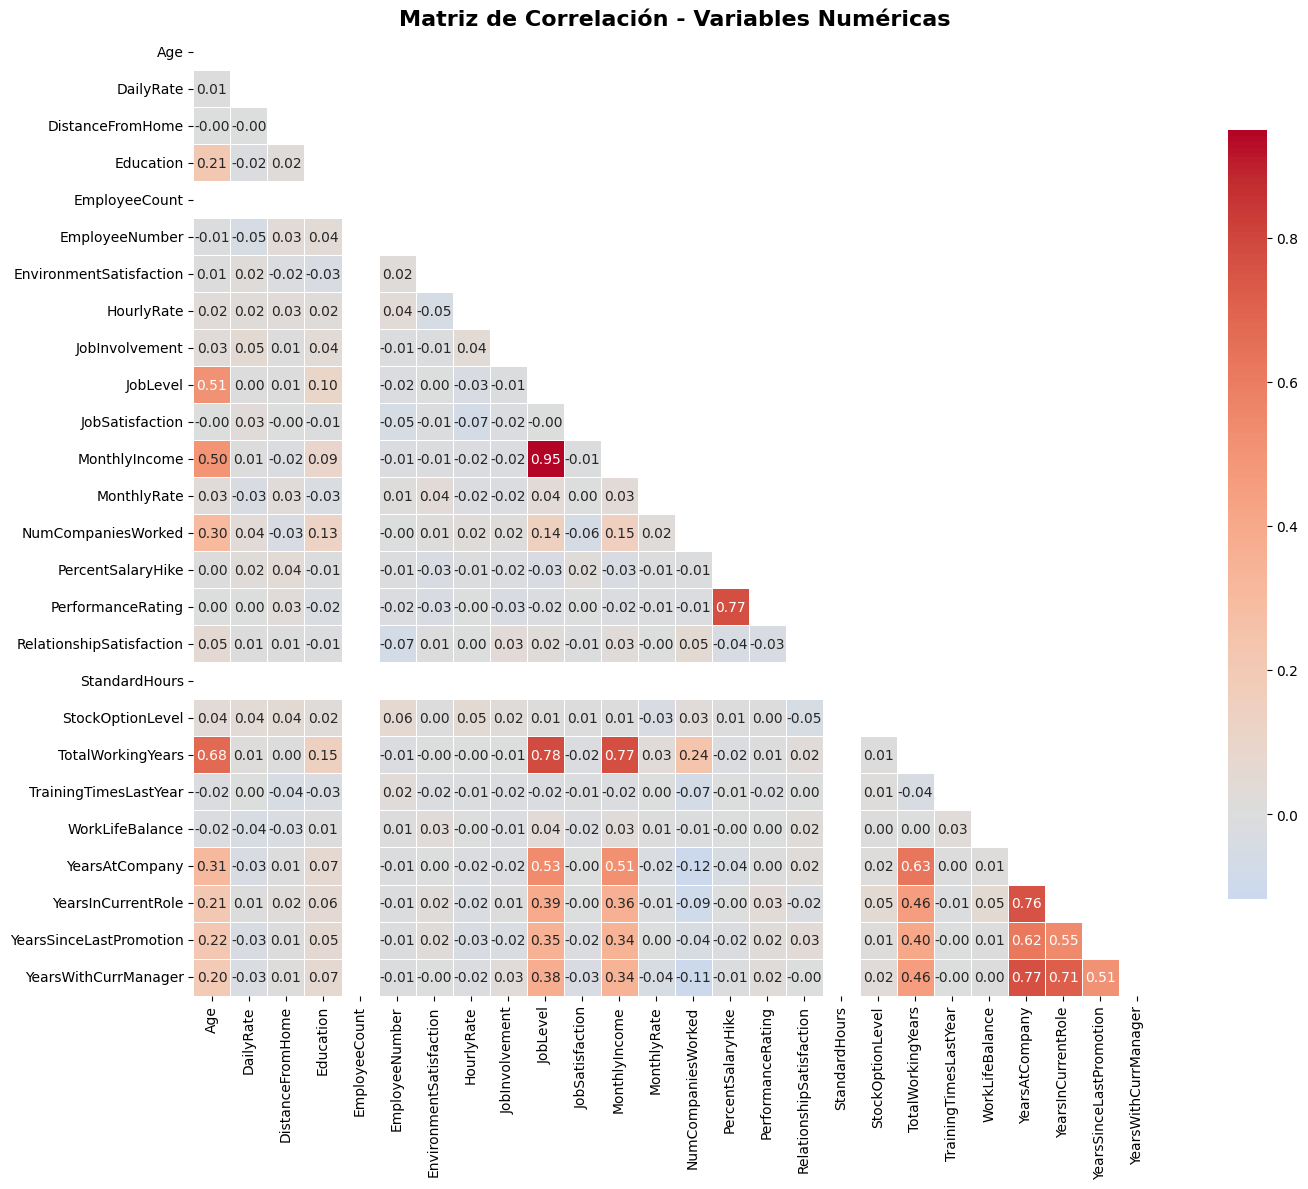


CORRELACIONES MÁS FUERTES:

Top 5 correlaciones con Age:
TotalWorkingYears     0.680381
JobLevel              0.509604
MonthlyIncome         0.497855
YearsAtCompany        0.311309
NumCompaniesWorked    0.299635
Name: Age, dtype: float64

Top 5 correlaciones con MonthlyIncome:
JobLevel              0.950300
TotalWorkingYears     0.772893
YearsAtCompany        0.514285
Age                   0.497855
YearsInCurrentRole    0.363818
Name: MonthlyIncome, dtype: float64

Top 5 correlaciones con TotalWorkingYears:
JobLevel              0.782208
MonthlyIncome         0.772893
Age                   0.680381
YearsAtCompany        0.628133
YearsInCurrentRole    0.460365
Name: TotalWorkingYears, dtype: float64

Top 5 correlaciones con YearsAtCompany:
YearsWithCurrManager       0.769212
YearsInCurrentRole         0.758754
TotalWorkingYears          0.628133
YearsSinceLastPromotion    0.618409
JobLevel                   0.534739
Name: YearsAtCompany, dtype: float64


In [10]:
# Crear matriz de correlación
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# Heatmap de correlación
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Correlaciones más fuertes con variables específicas
print("\nCORRELACIONES MÁS FUERTES:")
print("="*50)
for col in ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany']:
    correlations = correlation_matrix[col].abs().sort_values(ascending=False)[1:6]
    print(f"\nTop 5 correlaciones con {col}:")
    print(correlations)


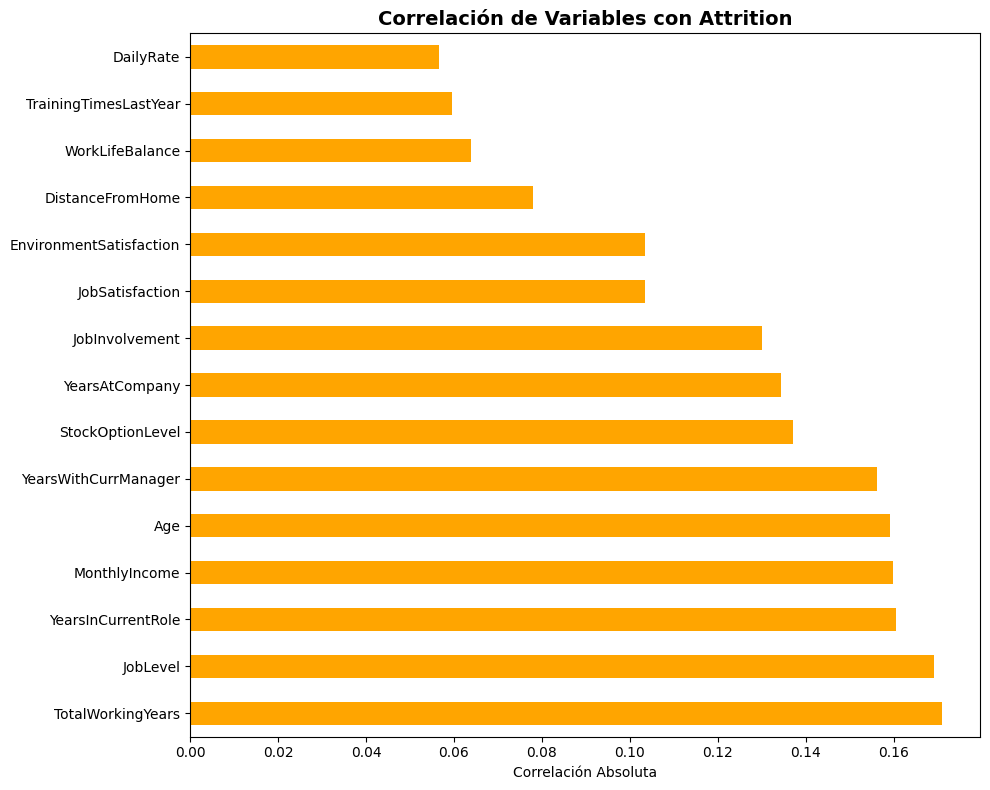


CORRELACIONES CON ATTRITION:
TotalWorkingYears          0.171063
JobLevel                   0.169105
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
StockOptionLevel           0.137145
YearsAtCompany             0.134392
JobInvolvement             0.130016
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
DistanceFromHome           0.077924
WorkLifeBalance            0.063939
TrainingTimesLastYear      0.059478
DailyRate                  0.056652
Name: Attrition_Numeric, dtype: float64


In [11]:
# Convertir Attrition a numérico para análisis
df['Attrition_Numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Correlación de variables numéricas con Attrition
attrition_corr = df.select_dtypes(include=[np.number]).corr()['Attrition_Numeric'].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
attrition_corr[1:16].plot(kind='barh', color='orange')
plt.title('Correlación de Variables con Attrition', fontsize=14, fontweight='bold')
plt.xlabel('Correlación Absoluta')
plt.tight_layout()
plt.show()

print("\nCORRELACIONES CON ATTRITION:")
print("="*40)
print(attrition_corr[1:16])



ANÁLISIS POR DEPARTAMENTO Y ROL:
                Department                    JobRole  Total_Employees  \
10                   Sales       Sales Representative               83   
3   Research & Development      Laboratory Technician              259   
0          Human Resources            Human Resources               52   
9                    Sales            Sales Executive              326   
7   Research & Development         Research Scientist              292   
5   Research & Development     Manufacturing Director              145   
2   Research & Development  Healthcare Representative              131   
4   Research & Development                    Manager               54   
8                    Sales                    Manager               37   
6   Research & Development          Research Director               80   
1          Human Resources                    Manager               11   

    Attrition_Count  Attrition_Rate  
10               33        0.397590  
3

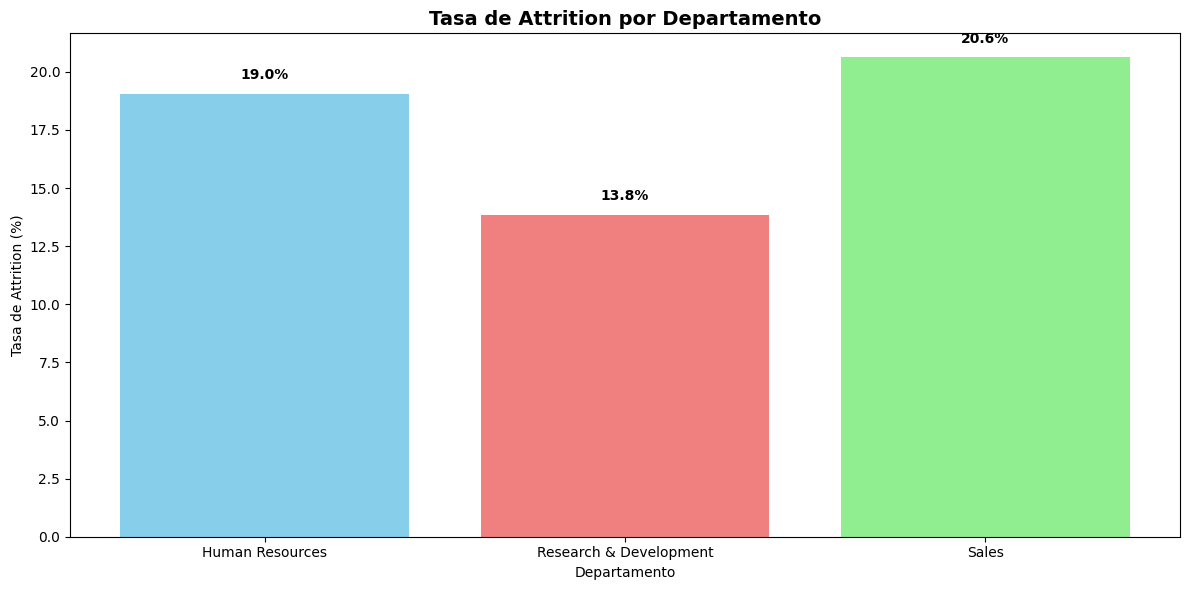

In [12]:
# Análisis por departamento y rol
dept_role_analysis = df.groupby(['Department', 'JobRole'])['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()
dept_role_analysis.columns = ['Department', 'JobRole', 'Total_Employees', 'Attrition_Count', 'Attrition_Rate']
dept_role_analysis = dept_role_analysis.sort_values('Attrition_Rate', ascending=False)

print("\nANÁLISIS POR DEPARTAMENTO Y ROL:")
print("="*50)
print(dept_role_analysis.head(15))

# Gráfico de attrition por departamento
plt.figure(figsize=(12, 6))
dept_summary = df.groupby('Department')['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()
dept_summary.columns = ['Department', 'Total_Employees', 'Attrition_Count', 'Attrition_Rate']

bars = plt.bar(dept_summary['Department'], dept_summary['Attrition_Rate'] * 100, 
               color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Tasa de Attrition por Departamento', fontsize=14, fontweight='bold')
plt.xlabel('Departamento')
plt.ylabel('Tasa de Attrition (%)')

# Añadir valores en las barras
for bar, rate in zip(bars, dept_summary['Attrition_Rate'] * 100):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
            f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

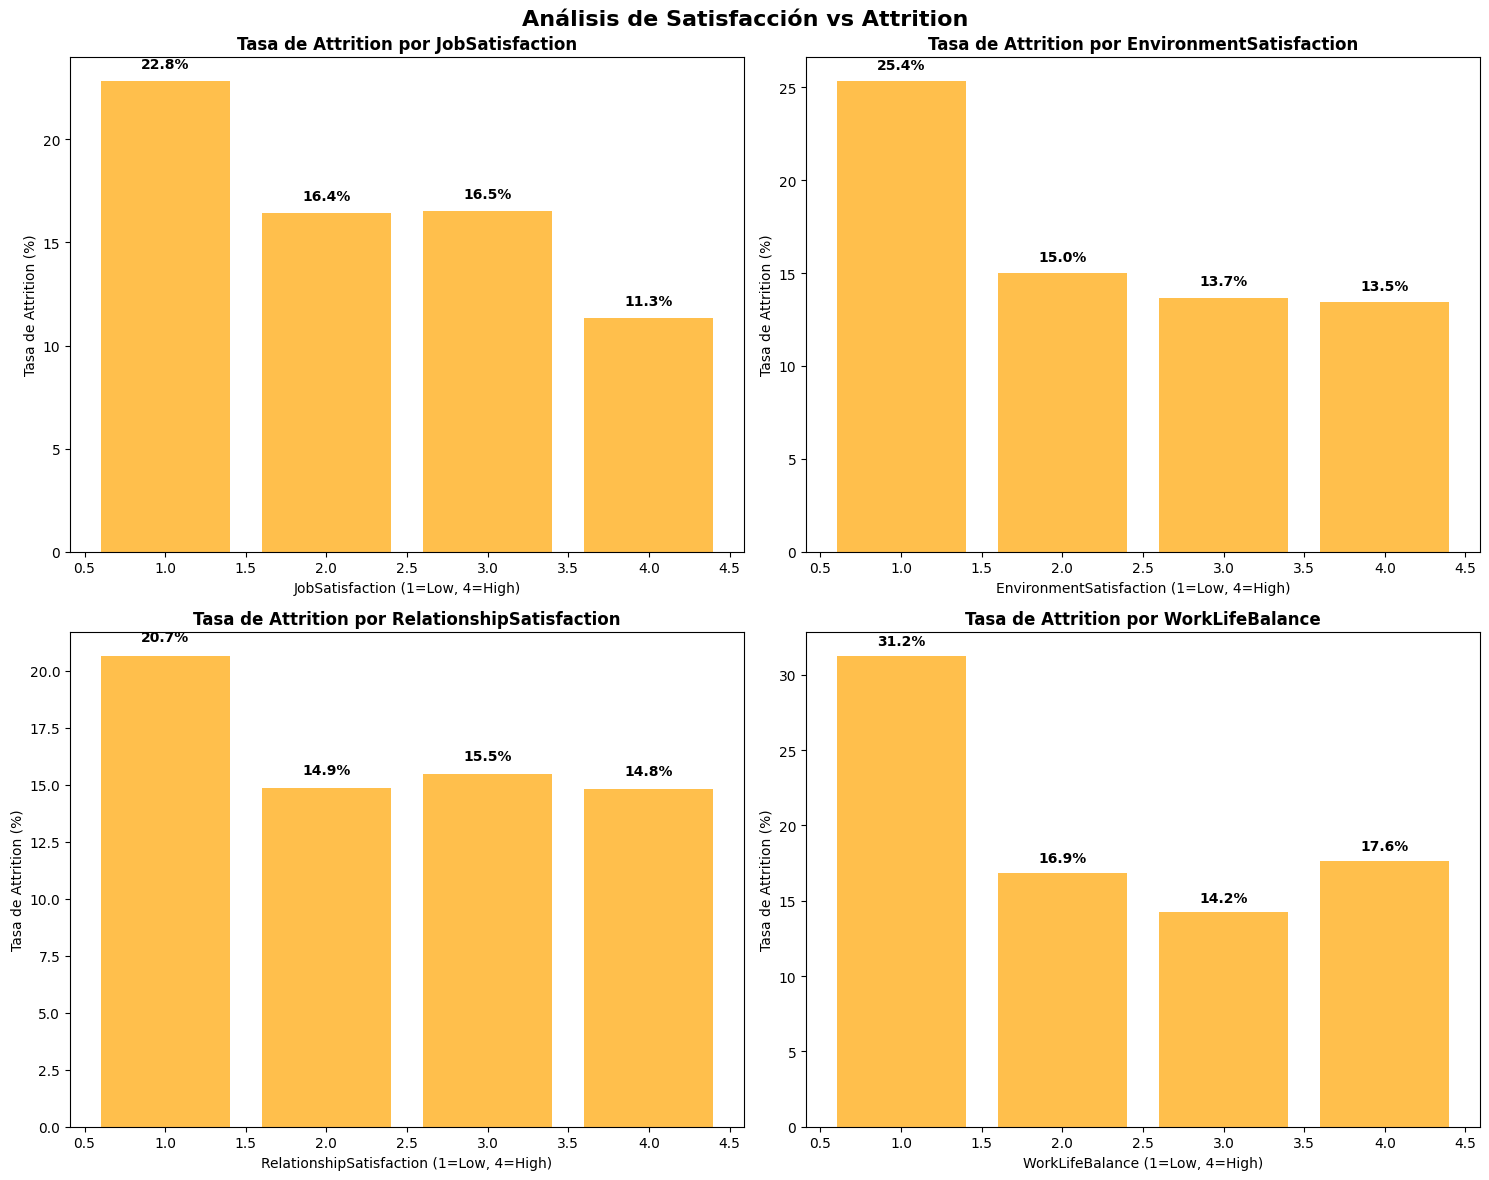

In [13]:
# Variables de satisfacción
satisfaction_vars = ['JobSatisfaction', 'EnvironmentSatisfaction', 
                    'RelationshipSatisfaction', 'WorkLifeBalance']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, var in enumerate(satisfaction_vars):
    # Calcular tasa de attrition por nivel de satisfacción
    satisfaction_analysis = df.groupby(var)['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()
    satisfaction_analysis.columns = [var, 'Total', 'Attrition_Count', 'Attrition_Rate']
    
    bars = axes[i].bar(satisfaction_analysis[var], satisfaction_analysis['Attrition_Rate'] * 100,
                      color='orange', alpha=0.7)
    axes[i].set_title(f'Tasa de Attrition por {var}', fontweight='bold')
    axes[i].set_xlabel(f'{var} (1=Low, 4=High)')
    axes[i].set_ylabel('Tasa de Attrition (%)')
    
    # Añadir valores en las barras
    for bar, rate in zip(bars, satisfaction_analysis['Attrition_Rate'] * 100):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                    f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.suptitle('Análisis de Satisfacción vs Attrition', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [14]:
df['WorkLifeBalance']

0       1
1       3
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    3
1468    2
1469    4
Name: WorkLifeBalance, Length: 1470, dtype: int64

C:\Users\peric\AppData\Local\Temp\ipykernel_11708\2354419437.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('Age_Group')['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()
C:\Users\peric\AppData\Local\Temp\ipykernel_11708\2354419437.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_analysis = df.groupby('Income_Group')['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()


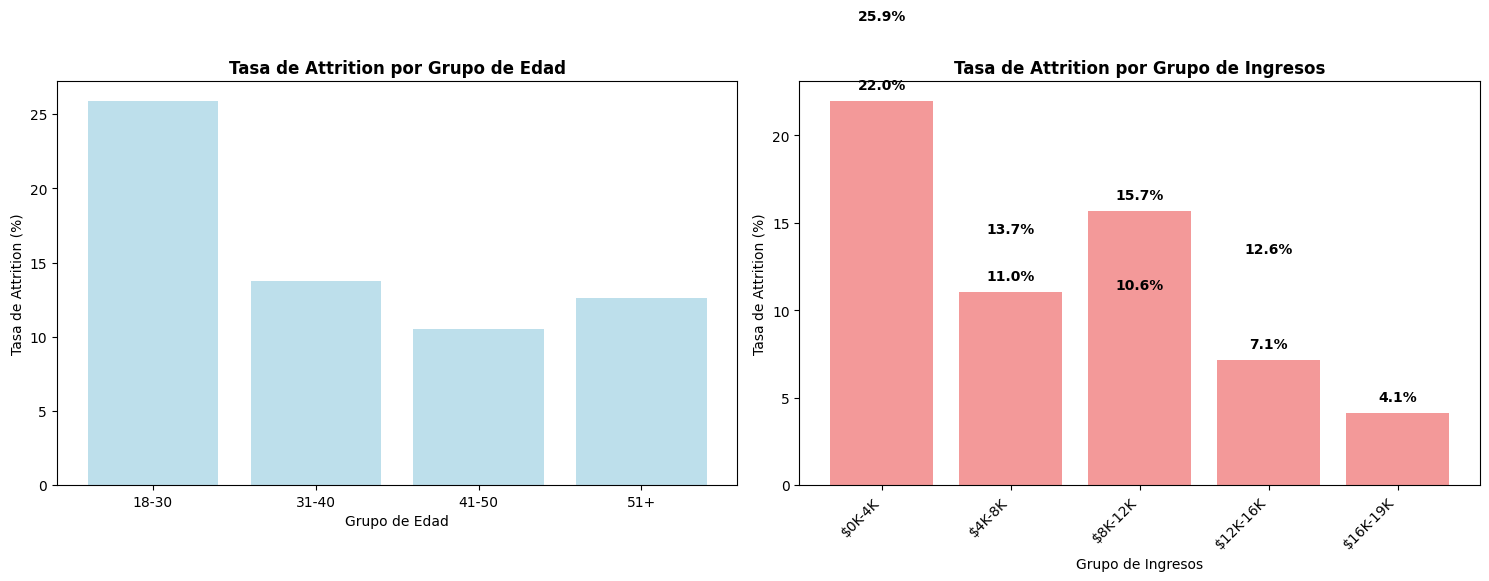


ANÁLISIS POR GRUPOS DE EDAD:
  Age_Group  Total  Attrition_Count  Attrition_Rate
0     18-30    386              100        0.259067
1     31-40    619               85        0.137318
2     41-50    322               34        0.105590
3       51+    143               18        0.125874

ANÁLISIS POR GRUPOS DE INGRESOS:
         Income_Group  Total  Attrition_Count  Attrition_Rate
0     (990.0, 4807.0]    714              157        0.219888
1    (4807.0, 8605.0]    399               44        0.110276
2   (8605.0, 12403.0]    166               26        0.156627
3  (12403.0, 16201.0]     70                5        0.071429
4  (16201.0, 19999.0]    121                5        0.041322


In [15]:
# Crear grupos de edad
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 100], 
                        labels=['18-30', '31-40', '41-50', '51+'])

# Crear grupos de ingresos
df['Income_Group'] = pd.cut(df['MonthlyIncome'], bins=5, precision=0)

# Análisis por grupos de edad
age_analysis = df.groupby('Age_Group')['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()
age_analysis.columns = ['Age_Group', 'Total', 'Attrition_Count', 'Attrition_Rate']

# Análisis por grupos de ingresos
income_analysis = df.groupby('Income_Group')['Attrition_Numeric'].agg(['count', 'sum', 'mean']).reset_index()
income_analysis.columns = ['Income_Group', 'Total', 'Attrition_Count', 'Attrition_Rate']

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico por edad
bars1 = axes[0].bar(range(len(age_analysis)), age_analysis['Attrition_Rate'] * 100, 
                   color='lightblue', alpha=0.8)
axes[0].set_title('Tasa de Attrition por Grupo de Edad', fontweight='bold')
axes[0].set_xlabel('Grupo de Edad')
axes[0].set_ylabel('Tasa de Attrition (%)')
axes[0].set_xticks(range(len(age_analysis)))
axes[0].set_xticklabels(age_analysis['Age_Group'])

# Gráfico por ingresos
bars2 = axes[1].bar(range(len(income_analysis)), income_analysis['Attrition_Rate'] * 100, 
                   color='lightcoral', alpha=0.8)
axes[1].set_title('Tasa de Attrition por Grupo de Ingresos', fontweight='bold')
axes[1].set_xlabel('Grupo de Ingresos')
axes[1].set_ylabel('Tasa de Attrition (%)')
axes[1].set_xticks(range(len(income_analysis)))
axes[1].set_xticklabels([f'${int(x.left/1000)}K-{int(x.right/1000)}K' for x in income_analysis['Income_Group']], 
                       rotation=45, ha='right')

# Añadir valores en las barras
for bars, analysis in [(bars1, age_analysis), (bars2, income_analysis)]:
    for bar, rate in zip(bars, analysis['Attrition_Rate'] * 100):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nANÁLISIS POR GRUPOS DE EDAD:")
print("="*40)
print(age_analysis)

print("\nANÁLISIS POR GRUPOS DE INGRESOS:")
print("="*40)
print(income_analysis)


ANÁLISIS MULTIVARIADO - Top 10 Combinaciones con Mayor Attrition:
                Department  Gender OverTime  Count  Attrition_Rate
11                   Sales    Male      Yes     66        0.424242
9                    Sales  Female      Yes     62        0.322581
7   Research & Development    Male      Yes    159        0.314465
0          Human Resources  Female       No     14        0.214286
5   Research & Development  Female      Yes    112        0.214286
3          Human Resources    Male      Yes     11        0.181818
8                    Sales  Female       No    127        0.141732
10                   Sales    Male       No    191        0.136126
2          Human Resources    Male       No     32        0.125000
6   Research & Development    Male       No    423        0.094563


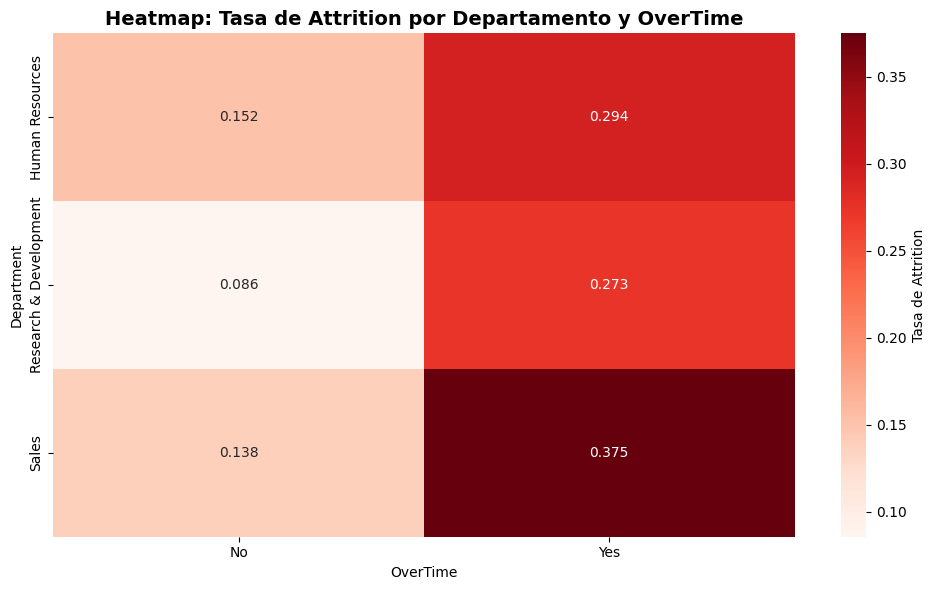

In [16]:
# Análisis de attrition por múltiples factores
multi_analysis = df.groupby(['Department', 'Gender', 'OverTime'])['Attrition_Numeric'].agg(['count', 'mean']).reset_index()
multi_analysis.columns = ['Department', 'Gender', 'OverTime', 'Count', 'Attrition_Rate']
multi_analysis = multi_analysis[multi_analysis['Count'] >= 10]  # Filtrar grupos pequeños
multi_analysis = multi_analysis.sort_values('Attrition_Rate', ascending=False)

print("\nANÁLISIS MULTIVARIADO - Top 10 Combinaciones con Mayor Attrition:")
print("="*70)
print(multi_analysis.head(10))

# Heatmap de attrition por combinaciones
pivot_data = df.pivot_table(values='Attrition_Numeric', 
                           index='Department', 
                           columns='OverTime', 
                           aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, cmap='Reds', fmt='.3f', cbar_kws={'label': 'Tasa de Attrition'})
plt.title('Heatmap: Tasa de Attrition por Departamento y OverTime', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [17]:
print("\n" + "="*80)
print("RESUMEN ESTADÍSTICO FINAL")
print("="*80)

print(f"\n1. INFORMACIÓN GENERAL:")
print(f"   - Total de empleados: {len(df):,}")
print(f"   - Empleados que abandonaron: {df['Attrition_Numeric'].sum():,}")
print(f"   - Tasa general de attrition: {df['Attrition_Numeric'].mean() * 100:.2f}%")

print(f"\n2. FACTORES DE MAYOR RIESGO:")
# Top departamentos con mayor attrition
top_dept = df.groupby('Department')['Attrition_Numeric'].mean().sort_values(ascending=False)
print(f"   - Departamento con mayor attrition: {top_dept.index[0]} ({top_dept.iloc[0]*100:.1f}%)")

# Roles con mayor attrition
top_roles = df.groupby('JobRole')['Attrition_Numeric'].mean().sort_values(ascending=False)
print(f"   - Rol con mayor attrition: {top_roles.index[0]} ({top_roles.iloc[0]*100:.1f}%)")

# Impacto del overtime
overtime_impact = df.groupby('OverTime')['Attrition_Numeric'].mean()
print(f"   - Attrition con OverTime: {overtime_impact['Yes']*100:.1f}%")
print(f"   - Attrition sin OverTime: {overtime_impact['No']*100:.1f}%")

print(f"\n3. VARIABLES MÁS CORRELACIONADAS CON ATTRITION:")
top_corr = attrition_corr[1:6]
for var, corr in top_corr.items():
    print(f"   - {var}: {corr:.3f}")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO - Revisa todos los gráficos generados")
print("="*80)


RESUMEN ESTADÍSTICO FINAL

1. INFORMACIÓN GENERAL:
   - Total de empleados: 1,470
   - Empleados que abandonaron: 237
   - Tasa general de attrition: 16.12%

2. FACTORES DE MAYOR RIESGO:
   - Departamento con mayor attrition: Sales (20.6%)
   - Rol con mayor attrition: Sales Representative (39.8%)
   - Attrition con OverTime: 30.5%
   - Attrition sin OverTime: 10.4%

3. VARIABLES MÁS CORRELACIONADAS CON ATTRITION:
   - TotalWorkingYears: 0.171
   - JobLevel: 0.169
   - YearsInCurrentRole: 0.161
   - MonthlyIncome: 0.160
   - Age: 0.159

ANÁLISIS COMPLETADO - Revisa todos los gráficos generados


In [18]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_Numeric,Age_Group,Income_Group
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,41-50,"(4807.0, 8605.0]"
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,41-50,"(4807.0, 8605.0]"
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,31-40,"(990.0, 4807.0]"
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,31-40,"(990.0, 4807.0]"
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,18-30,"(990.0, 4807.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,17,3,3,5,2,0,3,0,31-40,"(990.0, 4807.0]"
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,9,5,3,7,7,1,7,0,31-40,"(8605.0, 12403.0]"
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,6,0,3,6,2,0,3,0,18-30,"(4807.0, 8605.0]"
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,17,3,2,9,6,0,8,0,41-50,"(4807.0, 8605.0]"
